In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from datetime import datetime
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [26]:
df = pd.read_csv('household_consumption.csv')

In [27]:
df

hh_id  year  month  zipcode  mozip    lusage     luse1     luse2  \
0           3  2010      4     53.0  540.0  6.322805  6.505642  6.388161   
1           3  2010      5     53.0  541.0  6.510683  6.505642  6.388161   
2           3  2010      6     53.0  542.0  6.696693  6.505642  6.388161   
3           3  2010      7     53.0  543.0  6.967286  6.505642  6.388161   
4           3  2010      8     53.0  544.0  6.966908  6.505642  6.388161   
...       ...   ...    ...      ...    ...       ...       ...       ...   
318235  47356  2011      4     50.0  515.0  6.791299  6.696123  6.721847   
318236  47356  2011      5     50.0  516.0  6.949129  6.696123  6.721847   
318237  47356  2011      6     50.0  517.0  7.010714  6.696123  6.721847   
318238  47356  2011      7     50.0  518.0  7.193545  6.696123  6.721847   
318239  47356  2011      8     50.0  519.0  7.173882  6.696123  6.721847   

           luse3     luse4  ...  income2  income3  income4  income5  income6  \
0       6.207919  6.439571  ...      0.0      0.0      0.0      0.0      1.0   
1       6.207919  6.439571  ...      0.0      0.0      0.0      0.0      1.0   
2       6.207919  6.439571  ...      0.0      0.0      0.0      0.0      1.0   
3       6.207919  6.439571  ...      0.0      0.0      0.0      0.0      1.0   
4       6.207919  6.439571  ...      0.0      0.0      0.0      0.0      1.0   
...          ...       ...  ...      ...      ...      ...      ...      ...   
318235  6.800592  6.955112  ...      0.0      0.0      0.0      1.0      0.0   
318236  6.800592  6.955112  ...      0.0      0.0      0.0      1.0      0.0   
318237  6.800592  6.955112  ...      0.0      0.0      0.0      1.0      0.0   
318238  6.800592  6.955112  ...      0.0      0.0      0.0      1.0      0.0   
318239  6.800592  6.955112  ...      0.0      0.0      0.0      1.0      0.0   

        income7  income8  income9  owner     size  
0           0.0      0.0      0.0    1.0      NaN  
1           0.0      0.0      0.0    1.0      NaN  
2           0.0      0.0      0.0    1.0      NaN  
3           0.0      0.0      0.0    1.0      NaN  
4           0.0      0.0      0.0    1.0      NaN  
...         ...      ...      ...    ...      ...  
318235      0.0      0.0      0.0    1.0  12490.0  
318236      0.0      0.0      0.0    1.0  12490.0  
318237      0.0      0.0      0.0    1.0  12490.0  
318238      0.0      0.0      0.0    1.0  12490.0  
318239      0.0      0.0      0.0    1.0  12490.0  

[318240 rows x 28 columns]

In [28]:
df.columns

Index(['hh_id', 'year', 'month', 'zipcode', 'mozip', 'lusage', 'luse1',
       'luse2', 'luse3', 'luse4', 'luse5', 'luse6', 'children', 'hhsize2',
       'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus', 'income2', 'income3',
       'income4', 'income5', 'income6', 'income7', 'income8', 'income9',
       'owner', 'size'],
      dtype='object')

In [29]:
len(df)

318240

In [30]:
df['hh_id'].unique()

array([    3,     4,     5, ..., 47354, 47355, 47356])

# Preparing the Data

I started by creating a new datetime column combining year and month as this would come in handy while doing the time series forecasting itself

In [31]:
df['date'] = pd.to_datetime(df['month'].astype(str) + '/' + df['year'].astype(str), format='%m/%Y')
df['date'] = df['date'].dt.strftime('%B %Y')

In [32]:
df['date'].head()

0     April 2010
1       May 2010
2      June 2010
3      July 2010
4    August 2010
Name: date, dtype: object

In [33]:
df.isna().sum()

hh_id              0
year               0
month              0
zipcode         2150
mozip           2150
lusage             0
luse1          15420
luse2           9830
luse3           8910
luse4           8940
luse5           8940
luse6           8810
children        2150
hhsize2            0
hhsize3            0
hhsize4            0
hhsize5            0
hhsize5plus        0
income2         2150
income3         2150
income4         2150
income5         2150
income6         2150
income7         2150
income8         2150
income9         2150
owner           2150
size           93710
date               0
dtype: int64

After taking an initial look i noticed zip_code, children and income2-9 are all missing the same 2150 values, a number which is negligable, given the dataset itself has over 300k obs, those values not even accounting for 1% of the total number of rows, so filling those values would simply not be worth the time and effort, besides that, filling an identifier column like zip_code could prove itself a bit problematic.

In [34]:
df.dropna(subset=['zipcode'], inplace=True)

Now that I took care of the least impactful missing data, I proceeded to move further, to adressing the issues related to the missing luse 1-6 values, while the missing values are still less than 10% of the total rows, this time, given they number over 10k observations, straight up deleting them could prove problematic.

In [35]:
df.isna().sum()

hh_id              0
year               0
month              0
zipcode            0
mozip              0
lusage             0
luse1          15360
luse2           9800
luse3           8890
luse4           8920
luse5           8920
luse6           8790
children           0
hhsize2            0
hhsize3            0
hhsize4            0
hhsize5            0
hhsize5plus        0
income2            0
income3            0
income4            0
income5            0
income6            0
income7            0
income8            0
income9            0
owner              0
size           91560
date               0
dtype: int64

Before continuing with the data cleaning I wanted to check te frequencies of each categorial value and see what percentage each of them occupy and if they do actually account for the entirety of the data set.
While on it, i did notice that both income and hhsize did not add at to 100%.

I would later address this issue.

In [36]:
for column in df.iloc[:, 12:27].columns:
    print(f"Percentage breakdown for {column}:")
    print(df[column].value_counts(normalize=True) * 100)
    print("\n")

Percentage breakdown for children:
children
0.0    69.638394
1.0    30.361606
Name: proportion, dtype: float64


Percentage breakdown for hhsize2:
hhsize2
0    68.819007
1    31.180993
Name: proportion, dtype: float64


Percentage breakdown for hhsize3:
hhsize3
0    75.801196
1    24.198804
Name: proportion, dtype: float64


Percentage breakdown for hhsize4:
hhsize4
0    84.244994
1    15.755006
Name: proportion, dtype: float64


Percentage breakdown for hhsize5:
hhsize5
0    91.568857
1     8.431143
Name: proportion, dtype: float64


Percentage breakdown for hhsize5plus:
hhsize5plus
0    94.450948
1     5.549052
Name: proportion, dtype: float64


Percentage breakdown for income2:
income2
0.0    94.735677
1.0     5.264323
Name: proportion, dtype: float64


Percentage breakdown for income3:
income3
0.0    90.667215
1.0     9.332785
Name: proportion, dtype: float64


Percentage breakdown for income4:
income4
0.0    88.632984
1.0    11.367016
Name: proportion, dtype: float64


Percentage 

I proceeded to create a function for calculating the coefficients of variations of the variables who still had missing data.

In [37]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

As it can be seen, all of the luse variables have a cv of less than 10, making them quite homogenous, given the missing values account for less than 10% of the dataset and that the variables are homogenous in nature, filling the null values with the mean would be provide a decent enough solution.

On the other hand, size's cv's is huge, given the amount of variance but also the amount of data missing, simply inputing the mean would not come close to being an acceptable solution.

In [38]:
for column in df.iloc[:, list(range(6, 12)) + [27]].columns:
    print(f"Coefficient of Variation for {column}:")
    print(cv(df[column]))
    print("\n")

Coefficient of Variation for luse1:
9.543722868554093


Coefficient of Variation for luse2:
9.444592408532595


Coefficient of Variation for luse3:
9.724134150121886


Coefficient of Variation for luse4:
9.63068231766426


Coefficient of Variation for luse5:
9.347428490412993


Coefficient of Variation for luse6:
9.170970821024932


Coefficient of Variation for size:
59.67389809969785




Here i addressed the fact that neither hhsize nor income accounted for the entire dataset and created variables that automatically asign a value of 1 to the observations which do not fit in any of the original 2-5plus and 1-9 variables.

In [39]:
len(df)

df['hhsize1'] = ~(df[['hhsize2', 'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus']].any(axis=1))

df['hhsize1'] = df['hhsize1'].astype(int)

df['income1'] = ~(df[['income2', 'income3', 'income4', 'income5', 'income6','income7','income8','income9']].any(axis=1))

df['income1'] = df['income1'].astype(int)


print(df[['hhsize1']])
print(df[['income1']])

len(df)

        hhsize1
0             0
1             0
2             0
3             0
4             0
...         ...
318235        0
318236        0
318237        0
318238        0
318239        0

[316090 rows x 1 columns]
        income1
0             0
1             0
2             0
3             0
4             0
...         ...
318235        0
318236        0
318237        0
318238        0
318239        0

[316090 rows x 1 columns]


316090

Here i created two new columns which contain the range of hsize and income each household can have, this would make subsetting/filtering data easier and in the case of hsize, which directly represents the number of people living in the household, using it in this form rather than multipe bool columns could prove itself more efficient if planning to use hsize as a predictor variable.

In [40]:
columns_to_reverse = df.iloc[:, 13:18]
columns_to_reverse = pd.concat([columns_to_reverse, df.iloc[:, 29]], axis=1)

df['hsize'] = columns_to_reverse.idxmax(axis=1)
df['hsize'] = df['hsize'].str.extract('(\d+)').astype(int)

#income
columns_to_reverse = df.iloc[:, 18:26]
columns_to_reverse = pd.concat([columns_to_reverse, df.iloc[:, 30]], axis=1)

df['income'] = columns_to_reverse.idxmax(axis=1)
df['income'] = df['income'].str.extract('(\d+)').astype(int)

print(df[['hsize']])
print(df[['income']])

        hsize
0           4
1           4
2           4
3           4
4           4
...       ...
318235      2
318236      2
318237      2
318238      2
318239      2

[316090 rows x 1 columns]
        income
0            6
1            6
2            6
3            6
4            6
...        ...
318235       5
318236       5
318237       5
318238       5
318239       5

[316090 rows x 1 columns]


Here I just saved the df as a cv so i can check quite easily if everythign went smoothly using excel.

In [41]:
df.to_csv('reversebinary.csv', index=False)

Rather than just directly filling missing luse values with the mean of their entire columns, i opted to group by income and hsize, to affect variation as little as possible.

In [42]:
df_not_null = df.dropna(subset=df.columns[6:12])

mean_values = df_not_null.groupby(['income', 'hsize'])[df.columns[6:12]].mean().reset_index()
print(mean_values)

    income  hsize     luse1     luse2     luse3     luse4     luse5     luse6
0        1      1  5.831092  5.815840  5.833251  6.008524  6.120649  5.902359
1        1      2  5.914547  5.901863  5.922371  6.102632  6.232302  5.990816
2        1      3  6.014760  5.998496  6.025098  6.193689  6.317995  6.083761
3        1      4  6.126512  6.106832  6.134332  6.302704  6.419052  6.190475
4        1      5  6.124084  6.113352  6.142784  6.333839  6.467813  6.206258
5        2      1  5.783587  5.743035  5.768826  5.953203  6.063091  5.820458
6        2      2  5.885380  5.851749  5.874313  6.067172  6.200482  5.914317
7        2      3  6.010727  5.994120  6.034390  6.231071  6.361235  6.072744
8        2      4  6.100317  6.099879  6.127601  6.304056  6.435258  6.147441
9        2      5  6.097173  6.105205  6.150572  6.322646  6.458267  6.156375
10       3      1  5.882055  5.842853  5.870395  6.073471  6.207067  5.925283
11       3      2  5.913649  5.903148  5.930480  6.132681  6.271

This is the code that i have written for inputting the means from the above cell, based on the corresponding income and hsize level.

In [43]:
for column in df.columns[6:12]:
    if df[column].isnull().any():
        for hh_id in df['hh_id'].unique():
            mask_null = df['hh_id'] == hh_id
            mask_column = df[column].isna()
            df_null = df[mask_null & mask_column]

            if not df_null.empty:
                for index, row in df_null.iterrows():
                    income = row['income']
                    hsize = row['hsize']

                    mean_value_row = mean_values[(mean_values['income'] == income) & (mean_values['hsize'] == hsize)]
                    if not mean_value_row.empty:
                        mean_value = mean_value_row[column].values[0]
                        df.loc[index, column] = mean_value

print(df)

        hh_id  year  month  zipcode  mozip    lusage     luse1     luse2  \
0           3  2010      4     53.0  540.0  6.322805  6.505642  6.388161   
1           3  2010      5     53.0  541.0  6.510683  6.505642  6.388161   
2           3  2010      6     53.0  542.0  6.696693  6.505642  6.388161   
3           3  2010      7     53.0  543.0  6.967286  6.505642  6.388161   
4           3  2010      8     53.0  544.0  6.966908  6.505642  6.388161   
...       ...   ...    ...      ...    ...       ...       ...       ...   
318235  47356  2011      4     50.0  515.0  6.791299  6.696123  6.721847   
318236  47356  2011      5     50.0  516.0  6.949129  6.696123  6.721847   
318237  47356  2011      6     50.0  517.0  7.010714  6.696123  6.721847   
318238  47356  2011      7     50.0  518.0  7.193545  6.696123  6.721847   
318239  47356  2011      8     50.0  519.0  7.173882  6.696123  6.721847   

           luse3     luse4  ...  income7  income8  income9  owner     size  \
0       6

Now the only part of the data that needs fixing is the size variable, which has an extremely large number of missing values.

In [44]:
df.isna().sum()

hh_id              0
year               0
month              0
zipcode            0
mozip              0
lusage             0
luse1              0
luse2              0
luse3              0
luse4              0
luse5              0
luse6              0
children           0
hhsize2            0
hhsize3            0
hhsize4            0
hhsize5            0
hhsize5plus        0
income2            0
income3            0
income4            0
income5            0
income6            0
income7            0
income8            0
income9            0
owner              0
size           91560
date               0
hhsize1            0
income1            0
hsize              0
income             0
dtype: int64

While I computed the coefficent of variance earlier, i still wanted to take a look at how the density of the size variable looks in it's default state.

Text(0, 0.5, 'Density')

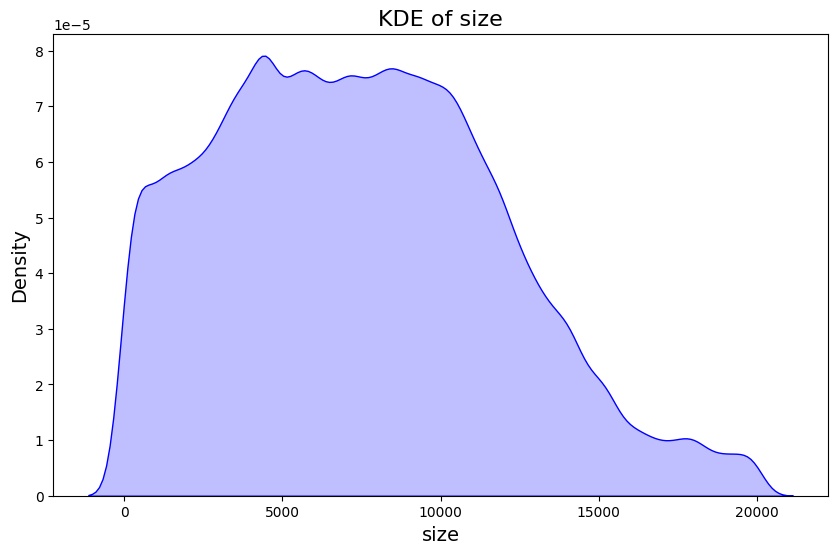

In [45]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df['size'], color='blue', fill=True)

plt.title('KDE of size', fontsize=16)
plt.xlabel('size', fontsize=14)
plt.ylabel('Density', fontsize=14)

Once again, i downloaded the df in csv format just to make sure everything converted without issues.

In [46]:
df.to_csv('inputedluse.csv', index=False)

I selected only the numeric values from the dataframe in order to be able to perform correlation on them.

In [47]:
columns_to_keep = ['lusage', 'luse1', 'luse2', 'luse3', 'luse4', 'luse5', 'luse6', 'hsize', 'income', 'children', 'owner','size']


df_selected = df[columns_to_keep].dropna()


df_selected.head()

corr = df_selected.corr()

corr.style.background_gradient(cmap='coolwarm')


It appears that size's correlation with the other variables is quite insignificant, none of coefficients being bigger or equal to 0.30 or smaller or equal to -0.30.
A quite proeminent detail of this heatmap is that lusage correlates heavily with it's past values.

In [48]:
pivot_df = df.pivot(index='hh_id', columns='date', values='lusage').reset_index()

pivot_df.columns = ['hh_id'] + [f'lusage_{col}' for col in pivot_df.columns[1:]]

agg_vars = df.groupby('hh_id').agg({
    'zipcode': 'first',
    'luse1': 'first',
    'luse2': 'first',
    'luse3': 'first',
    'luse4': 'first',
    'luse5': 'first',
    'luse6': 'first',
    'children': 'first',
    'hsize': 'first',
    'income': 'first',
    'income1': 'first',
    'income2': 'first',
    'income3': 'first',
    'income4': 'first',
    'income5': 'first',
    'income6': 'first',
    'income7': 'first',
    'income8': 'first',
    'income9': 'first',
    'owner': 'first',
    'size': 'first'
}).reset_index()

training_df = pd.merge(agg_vars, pivot_df, on='hh_id')
print(training_df)

training_df['size'].isnull().sum()

       hh_id  zipcode     luse1     luse2     luse3     luse4     luse5  \
0          3     53.0  6.505642  6.388161  6.207919  6.439571  6.651676   
1          4     53.0  5.894181  5.868767  6.061255  6.506459  6.364962   
2          5     53.0  5.501752  5.306729  5.079502  5.113806  5.158660   
3          6     49.0  5.553725  5.525934  5.687505  5.851208  6.117013   
4          7      1.0  5.783908  5.824327  6.128932  6.442861  6.651216   
...      ...      ...       ...       ...       ...       ...       ...   
31604  47351     49.0  5.103777  5.138836  5.097225  5.177035  5.257531   
31605  47352     53.0  4.650344  4.665795  4.657640  4.746334  4.821772   
31606  47354     53.0  6.752465  6.652863  6.775845  7.166614  7.334414   
31607  47355     49.0  5.440094  5.416866  5.358942  5.295123  5.233981   
31608  47356     50.0  6.696123  6.721847  6.800592  6.955112  7.011101   

          luse6  children  hsize  ...  lusage_April 2010  lusage_April 2011  \
0      6.481242     

9156

I ended up chaging the shape of the dataframe, including all the record usage values into a single observation, to better accomadate the building of machine learning models, in order to predict the missing size values.

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


df_not_null = training_df.dropna(subset=['size'])
X = df_not_null.loc[:, df_not_null.columns.difference(['size', 'zipcode', 'hh_id','income'])]
y = df_not_null['size']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)


from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Regression Coeficients: \n')
print(regr.coef_)

y_pred = regr.predict(X_test)
print('\n')
print('Model Performance: \n')

def regression_results(y_true, y_pred):
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance, 4))
    print('r2: ', round(r2, 4))
    print('MAE: ', round(mean_absolute_error, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))


regression_results(y_test, y_pred)

Regression Coeficients: 

[   291.19055193    339.80670842    446.37525908     87.23072058
    -73.31120655    -13.07721074     55.70107423    -35.20094645
   -125.05463275   -197.2927193    -145.3703381     138.47648989
    810.06770817    291.207244     -125.56110082   -436.59828896
    380.8305346    -343.28133134   -169.18692164    620.02531286
   -756.5020561    4661.82089578   7017.08609215 -11775.4707939
  -1201.04299572    271.01964462    357.22154348    122.45034414]


Model Performance: 

explained_variance:  0.3941
r2:  0.394
MAE:  2601.412
MSE:  12202630.8769
RMSE:  3493.2264


The multivariate regression model that i built has quite a lackluster performance, managing to capture only 39.4% of the variation, on the other hand, the coefficients it assigned to each of the independent variables are quite noteworthy and seem to strongly hint that there is a link between size and the other variables.

In order to explore this potential link, I opted to build a decision tree model.

Mean Absolute Error: 2171.923124677911
Mean Squared Error: 7724920.017222741
Root Mean Squared Error: 2779.374033343253
R-squared: 0.6162712007454951


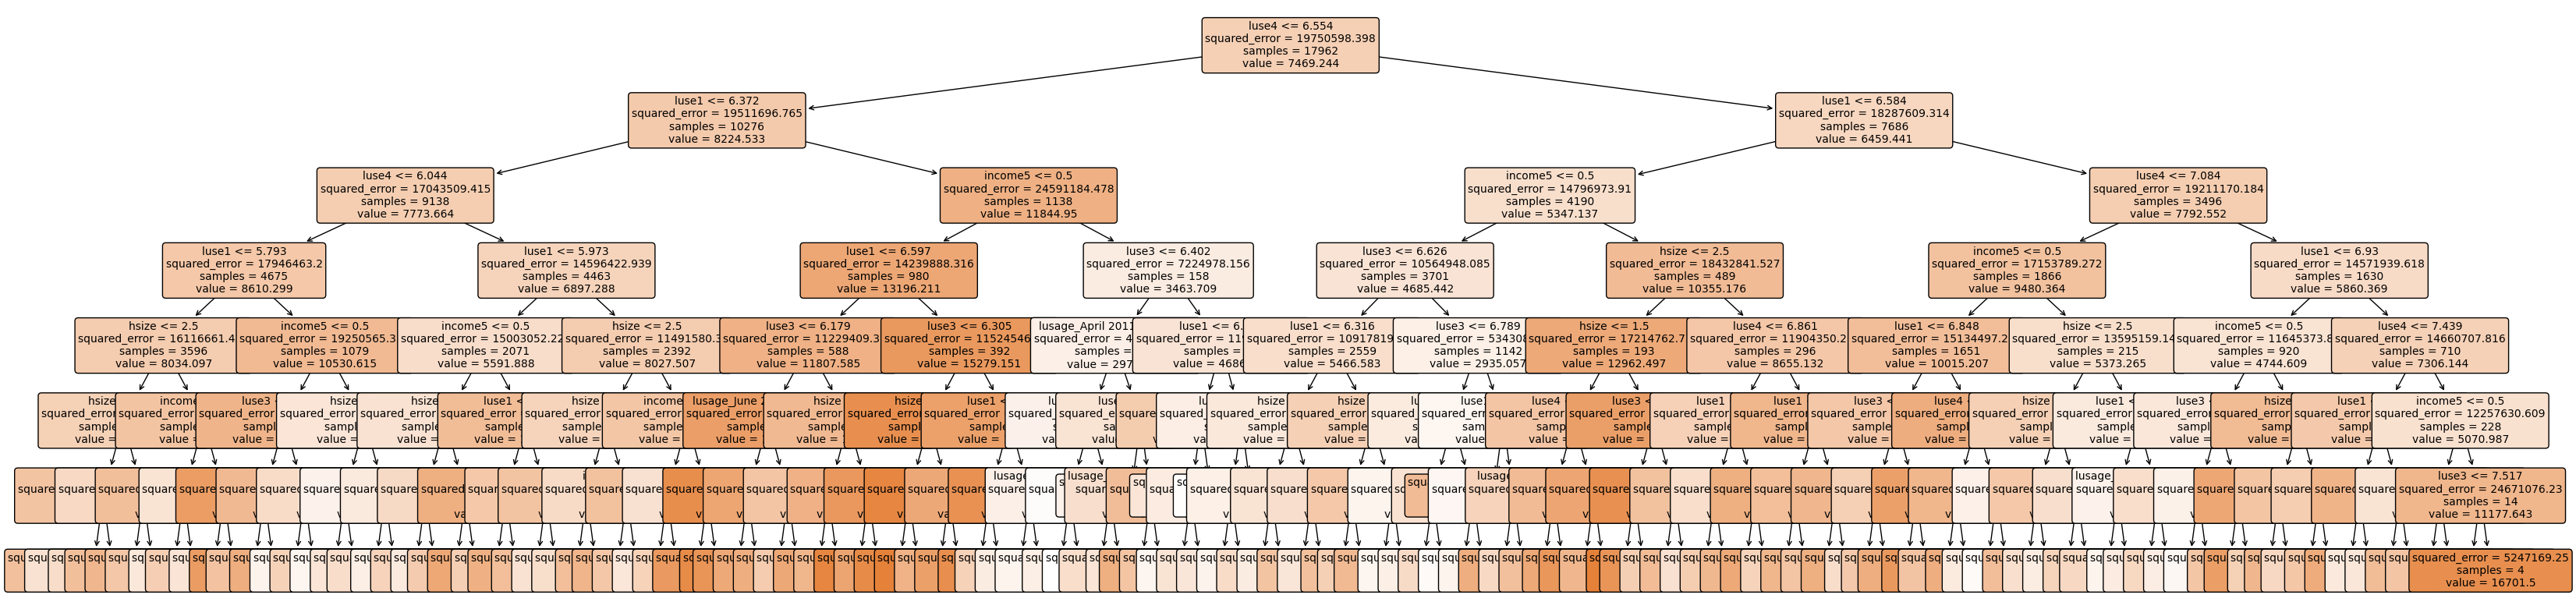

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

df_not_null = training_df.dropna()
X = df_not_null.loc[:, df_not_null.columns.difference(['size', 'zipcode', 'hh_id','income'])]
y = df_not_null['size']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr_tree = DecisionTreeRegressor(max_depth=7, min_samples_split=8, min_samples_leaf=3, random_state=42)
regr_tree.fit(X_train, y_train)


y_pred = regr_tree.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(40, 10))
plot_tree(regr_tree, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.show()

The tree managed quite a decent performance, capturing the variance in proportion of 61.6%, an improvement's to the multivariate regression's r squared of roughly 39%.

Mean Absolute Error: 1852.774299015884
Mean Squared Error: 5883271.823291884
Root Mean Squared Error: 2425.5456753670674
R-squared: 0.7078506525189923


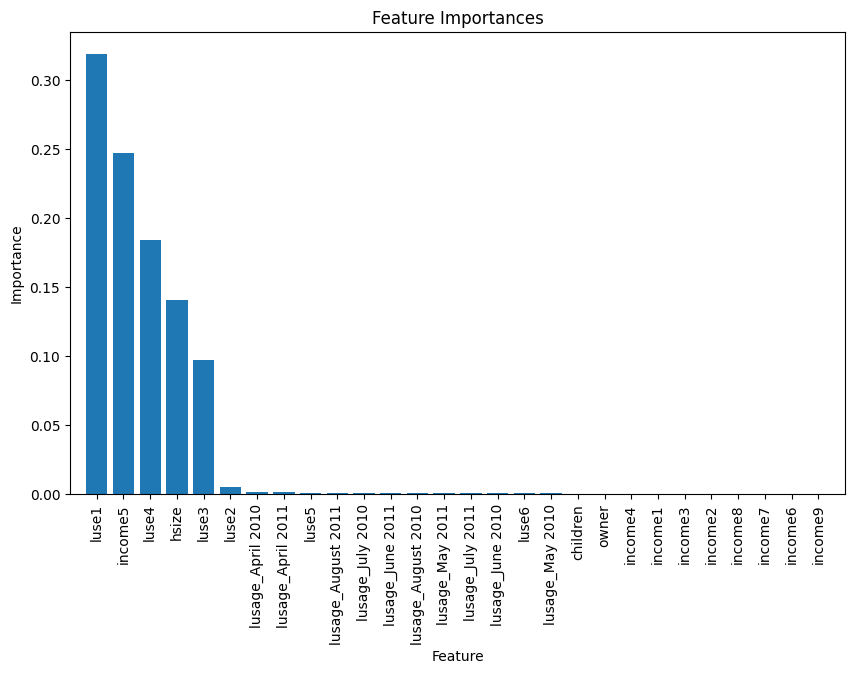

In [51]:
from sklearn.ensemble import RandomForestRegressor
df_not_null = training_df.dropna()
X = df_not_null.loc[:, df_not_null.columns.difference(['size', 'zipcode', 'hh_id','income'])]
y = df_not_null['size']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split=8, min_samples_leaf=3, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

After fitting a random forest model as well, I managed to achieve the higest performance yet, accounting for roughly 71% of the variance, decent enough to start doing predictions with it.
It can also be seen that among all variables, the significant ones are luse1-4, accounting for the usage recored in April-July 2009 and income5, which may suggest either that hosueholds with income 5 have on average considerably larger house or are just simply the most widespread.

In [52]:
df_missing_size = training_df[training_df['size'].isnull()]

X_missing = df_missing_size[X.columns]

predicted_sizes = rf_regressor.predict(X_missing)

training_df.loc[training_df['size'].isnull(), 'size'] = predicted_sizes

print(training_df.head())

   hh_id  zipcode     luse1     luse2     luse3     luse4     luse5     luse6  \
0      3     53.0  6.505642  6.388161  6.207919  6.439571  6.651676  6.481242   
1      4     53.0  5.894181  5.868767  6.061255  6.506459  6.364962  6.114429   
2      5     53.0  5.501752  5.306729  5.079502  5.113806  5.158660  5.340661   
3      6     49.0  5.553725  5.525934  5.687505  5.851208  6.117013  5.665863   
4      7      1.0  5.783908  5.824327  6.128932  6.442861  6.651216  5.933162   

   children  hsize  ...  lusage_April 2010  lusage_April 2011  \
0       1.0      4  ...           6.322805           6.456377   
1       0.0      2  ...           5.915738           6.071946   
2       0.0      1  ...           6.068280           7.047365   
3       0.0      2  ...           5.551448           5.591244   
4       0.0      2  ...           5.648221           5.679751   

   lusage_August 2010  lusage_August 2011  lusage_July 2010  lusage_July 2011  \
0            6.966908            6.699666

I proceeded to use the random forest model for predicting the missing values and as it can be seen, there are no more NaNs in the entire dataset.

In [53]:
training_df.isna().sum()

hh_id                 0
zipcode               0
luse1                 0
luse2                 0
luse3                 0
luse4                 0
luse5                 0
luse6                 0
children              0
hsize                 0
income                0
income1               0
income2               0
income3               0
income4               0
income5               0
income6               0
income7               0
income8               0
income9               0
owner                 0
size                  0
lusage_April 2010     0
lusage_April 2011     0
lusage_August 2010    0
lusage_August 2011    0
lusage_July 2010      0
lusage_July 2011      0
lusage_June 2010      0
lusage_June 2011      0
lusage_May 2010       0
lusage_May 2011       0
dtype: int64

In [54]:
training_df.to_csv('predicted_size.csv', index=False)

Text(0, 0.5, 'Frequency')

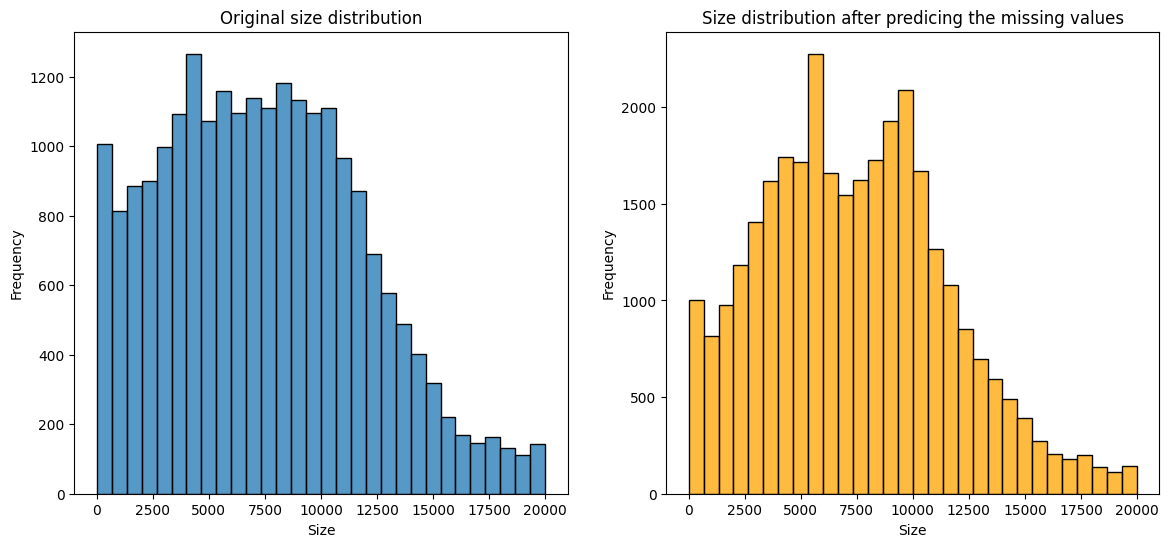

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_not_null['size'].dropna(), bins=30, edgecolor='black', ax=ax[0])
ax[0].set_title('Original size distribution')
ax[0].set_xlabel('Size')
ax[0].set_ylabel('Frequency')

sns.histplot(training_df['size'].dropna(), bins=30, color='orange', edgecolor='black', ax=ax[1])
ax[1].set_title('Size distribution after predicing the missing values')
ax[1].set_xlabel('Size')
ax[1].set_ylabel('Frequency')

I wanted to verify the filled values didn't alter the distribution of the data too much, first of all I displayed the histograms, corresponding to size before and after filling the data.

In [56]:
from scipy.stats import ks_2samp, kurtosis, skew

ks_result = ks_2samp(df_not_null['size'], training_df['size'])
print("Kolmogorov-Smirnov Test Result:", ks_result)


mean_df = df_not_null['size'].mean()
stdev_df = df_not_null['size'].std()
kurtosis_df = kurtosis(df_not_null['size'], fisher=False)
skewness_df = skew(df_not_null['size'])

print("\nStatistics for df_not_null['size']: ")
print("Mean:", mean_df)
print("Standard Deviation:", stdev_df)
print("Kurtosis:", kurtosis_df)
print("Skewness:", skewness_df)

mean_train = training_df['size'].mean()
stdev_train = training_df['size'].std()
kurtosis_train = kurtosis(training_df['size'], fisher=False)
skewness_train = skew(training_df['size'])

print("\nStatistics for training_df['size']: ")
print("Mean:", mean_train)
print("Standard Deviation:", stdev_train)
print("Kurtosis:", kurtosis_train)
print("Skewness:", skewness_train)

Kolmogorov-Smirnov Test Result: KstestResult(statistic=0.03571350325941311, pvalue=5.533638659941295e-15, statistic_location=2908.0, statistic_sign=1)

Statistics for df_not_null['size']: 
Mean: 7461.814813165279
Standard Deviation: 4452.845012607837
Kurtosis: 2.574204026928265
Skewness: 0.38025861976089886

Statistics for training_df['size']: 
Mean: 7480.278444662013
Standard Deviation: 4120.870886169631
Kurtosis: 2.7911321998783527
Skewness: 0.3968447648397901


standard deivation, kurtosis and skewness seem to be extremely similar, although the kolmogorov-smirnov test's null hyphosis, that states the datasets are identical must be rejected.

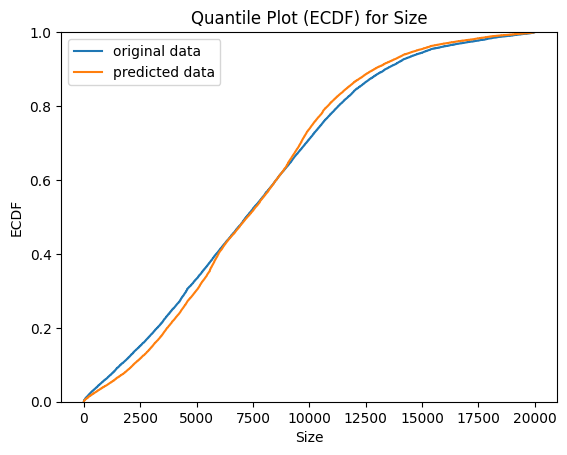

In [57]:
sns.ecdfplot(df_not_null['size'], label='original data')
sns.ecdfplot(training_df['size'], label='predicted data')

plt.title('Quantile Plot (ECDF) for Size')
plt.xlabel('Size')
plt.ylabel('ECDF')
plt.legend()

the strong similarity between the two datasets can also be seen clearly on this qplot. The mean/median values are near identical, differences starting to appear the further it goes.

In [58]:
training_df = training_df.rename(columns={
    'luse1': 'lusage_April 2009',
    'luse2': 'lusage_May 2009',
    'luse3': 'lusage_June 2009',
    'luse4': 'lusage_July 2009',
    'luse5': 'lusage_August 2009'
})

ts = pd.melt(training_df,
             id_vars=['hh_id', 'zipcode', 'size', 'hsize','income','children','owner'],
             var_name='date',
             value_name='usage')

ts = ts[~ts['date'].str.contains('luse6', na=False)]

ts['date'] = ts['date'].str.replace('lusage_', '')

ts['date'] = pd.to_datetime(ts['date'], format='%B %Y', errors='coerce')

ts = ts.dropna(subset=['date'])

ts = ts.sort_values(by=['hh_id', 'date'])

ts = ts.reset_index(drop=True)

print(ts)

        hh_id  zipcode          size  hsize  income  children  owner  \
0           3     53.0  12429.794637      4       6       1.0    1.0   
1           3     53.0  12429.794637      4       6       1.0    1.0   
2           3     53.0  12429.794637      4       6       1.0    1.0   
3           3     53.0  12429.794637      4       6       1.0    1.0   
4           3     53.0  12429.794637      4       6       1.0    1.0   
...       ...      ...           ...    ...     ...       ...    ...   
474130  47356     50.0  12490.000000      2       5       0.0    1.0   
474131  47356     50.0  12490.000000      2       5       0.0    1.0   
474132  47356     50.0  12490.000000      2       5       0.0    1.0   
474133  47356     50.0  12490.000000      2       5       0.0    1.0   
474134  47356     50.0  12490.000000      2       5       0.0    1.0   

             date     usage  
0      2009-04-01  6.505642  
1      2009-05-01  6.388161  
2      2009-06-01  6.207919  
3      2009-07-

Now that size has finally been filled, I reshaped the dataset once again, this time making a different chronological observation for all the recorded values of usage, including those from 2009.

In [59]:
ts.to_csv('timeseries.csv', index=False)

In [60]:
ts.isna().sum()

hh_id       0
zipcode     0
size        0
hsize       0
income      0
children    0
owner       0
date        0
usage       0
dtype: int64

In [61]:
ts.head(5)

hh_id  zipcode          size  hsize  income  children  owner       date  \
0      3     53.0  12429.794637      4       6       1.0    1.0 2009-04-01   
1      3     53.0  12429.794637      4       6       1.0    1.0 2009-05-01   
2      3     53.0  12429.794637      4       6       1.0    1.0 2009-06-01   
3      3     53.0  12429.794637      4       6       1.0    1.0 2009-07-01   
4      3     53.0  12429.794637      4       6       1.0    1.0 2009-08-01   

      usage  
0  6.505642  
1  6.388161  
2  6.207919  
3  6.439571  
4  6.651676

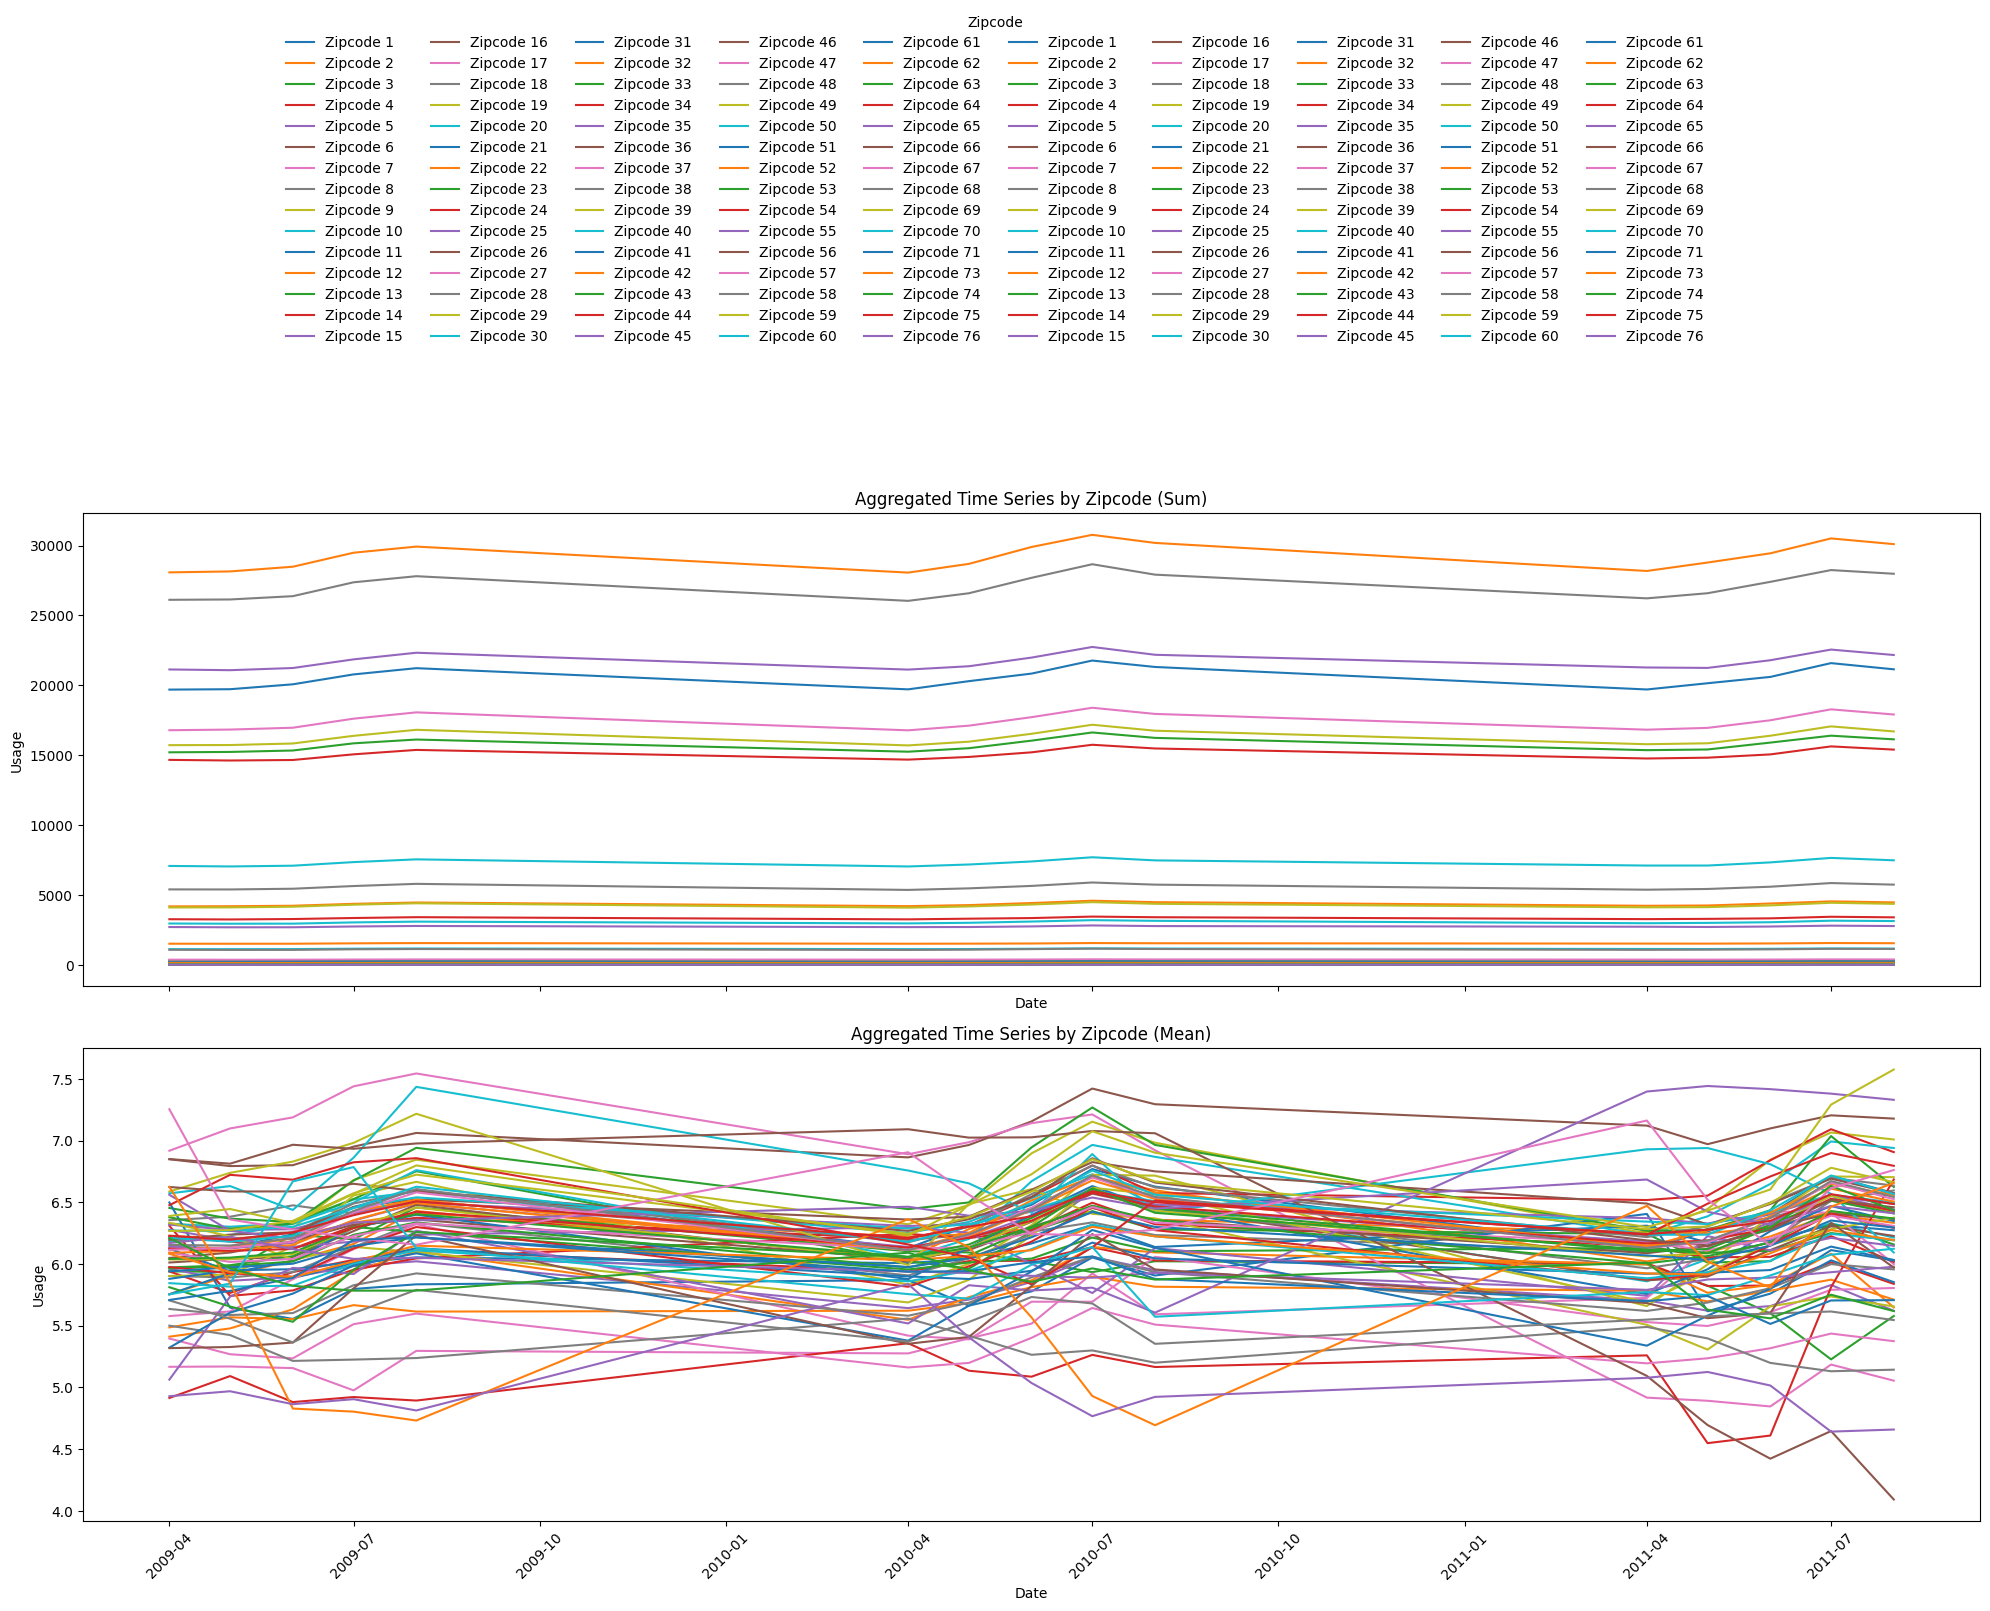

In [62]:
ts_aggregated_sum = ts.groupby(['zipcode', 'date'])['usage'].sum().reset_index()
ts_aggregated_mean = ts.groupby(['zipcode', 'date'])['usage'].mean().reset_index()

ts_aggregated_sum['zipcode'] = ts_aggregated_sum['zipcode'].astype(int)
ts_aggregated_mean['zipcode'] = ts_aggregated_mean['zipcode'].astype(int)


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12), sharex=True)

lines_sum = []
labels_sum = []
for zipcode in ts_aggregated_sum['zipcode'].unique():
    zipcode_data = ts_aggregated_sum[ts_aggregated_sum['zipcode'] == zipcode]
    line, = ax1.plot(zipcode_data['date'], zipcode_data['usage'], label=f'Zipcode {zipcode}')
    lines_sum.append(line)
    labels_sum.append(f'Zipcode {zipcode}')

ax1.set_title('Aggregated Time Series by Zipcode (Sum)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Usage')
ax1.tick_params(axis='x', rotation=45)

lines_mean = []
labels_mean = []
for zipcode in ts_aggregated_mean['zipcode'].unique():
    zipcode_data = ts_aggregated_mean[ts_aggregated_mean['zipcode'] == zipcode]
    line, = ax2.plot(zipcode_data['date'], zipcode_data['usage'], label=f'Zipcode {zipcode}')
    lines_mean.append(line)
    labels_mean.append(f'Zipcode {zipcode}')

ax2.set_title('Aggregated Time Series by Zipcode (Mean)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Usage')
ax2.tick_params(axis='x', rotation=45)

handles = lines_sum + lines_mean
labels = labels_sum + labels_mean
fig.legend(handles, labels, title='Zipcode', loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=10, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])


I wanted to visualise the time series aggregated by zip, since it could serve as an identifier column while having way less values than hh_id, which simply could not be displayed graphically.
As it can be seen the aggregated sum follows a similar trend across all zip codes, is just that the range of values is higher or lower, on the other hand aggregating by mean shows a lot more inconsistencies and individuality in regard to each zipcode.

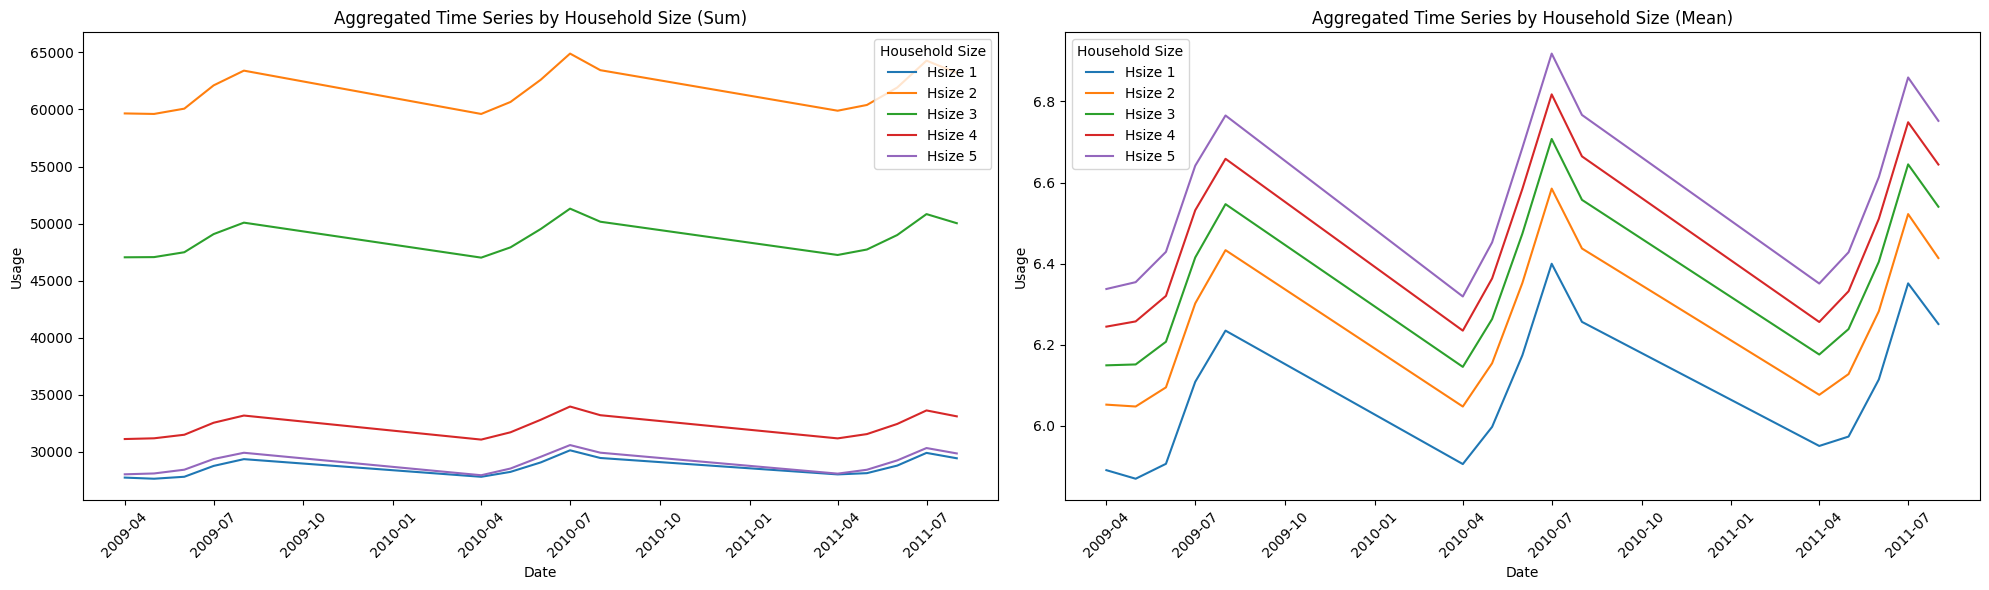

In [63]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ts_aggregated_sum = ts.groupby(['hsize', 'date'])['usage'].sum().reset_index()

for hh in ts_aggregated_sum['hsize'].unique():
    hh_data = ts_aggregated_sum[ts_aggregated_sum['hsize'] == hh]
    ax1.plot(hh_data['date'], hh_data['usage'], label=f'Hsize {hh}')

ax1.set_title('Aggregated Time Series by Household Size (Sum)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Usage')
ax1.legend(title='Household Size')
ax1.tick_params(axis='x', rotation=45)

ts_aggregated_mean = ts.groupby(['hsize', 'date'])['usage'].mean().reset_index()

for hh in ts_aggregated_mean['hsize'].unique():
    hh_data = ts_aggregated_mean[ts_aggregated_mean['hsize'] == hh]
    ax2.plot(hh_data['date'], hh_data['usage'], label=f'Hsize {hh}')

ax2.set_title('Aggregated Time Series by Household Size (Mean)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Usage')
ax2.legend(title='Household Size')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

Aggregating by hsize, on the other hand, seems to split the data in homogenous groupsboth for the mean and the sum, this could prove handy as a way to reduce dimensionality while testing various forecasting models.

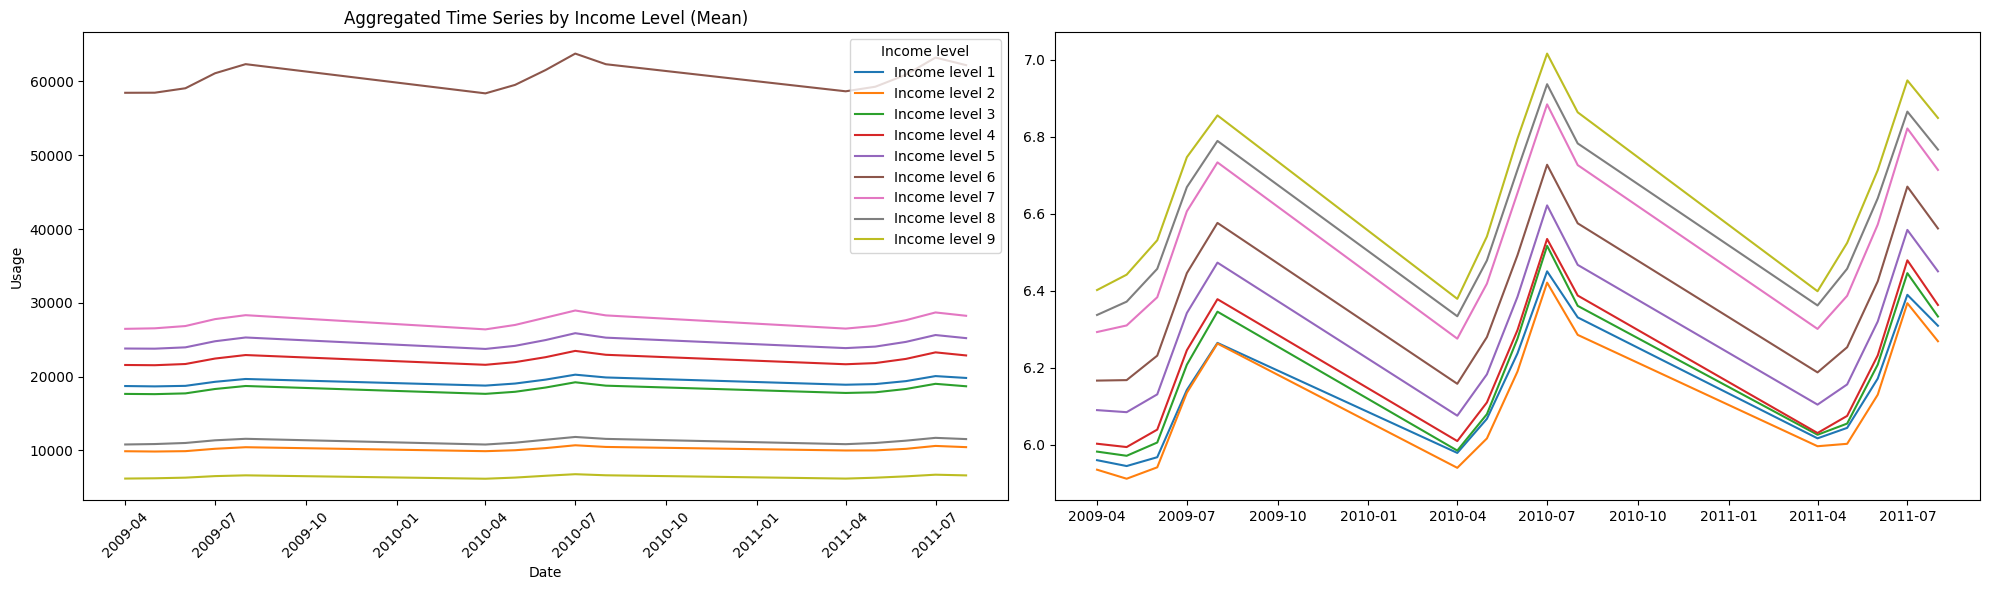

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ts_aggregated_sum = ts.groupby(['income', 'date'])['usage'].sum().reset_index()

for hh in ts_aggregated_sum['income'].unique():
    hh_data = ts_aggregated_sum[ts_aggregated_sum['income'] == hh]
    ax1.plot(hh_data['date'], hh_data['usage'], label=f'Income level {hh}')

ax1.set_title('Aggregated Time Series by Income Level (Sum)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Usage')
ax1.legend(title='Income level')
ax1.tick_params(axis='x', rotation=45)

ts_aggregated_mean = ts.groupby(['income', 'date'])['usage'].mean().reset_index()

for hh in ts_aggregated_mean['income'].unique():
    hh_data = ts_aggregated_mean[ts_aggregated_mean['income'] == hh]
    ax2.plot(hh_data['date'], hh_data['usage'], label=f'Income level {hh}')

ax1.set_title('Aggregated Time Series by Income Level (Mean)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Usage')
ax1.legend(title='Income level')
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

Similarely to hsize, grouping by income creates pretty homogenous time series.

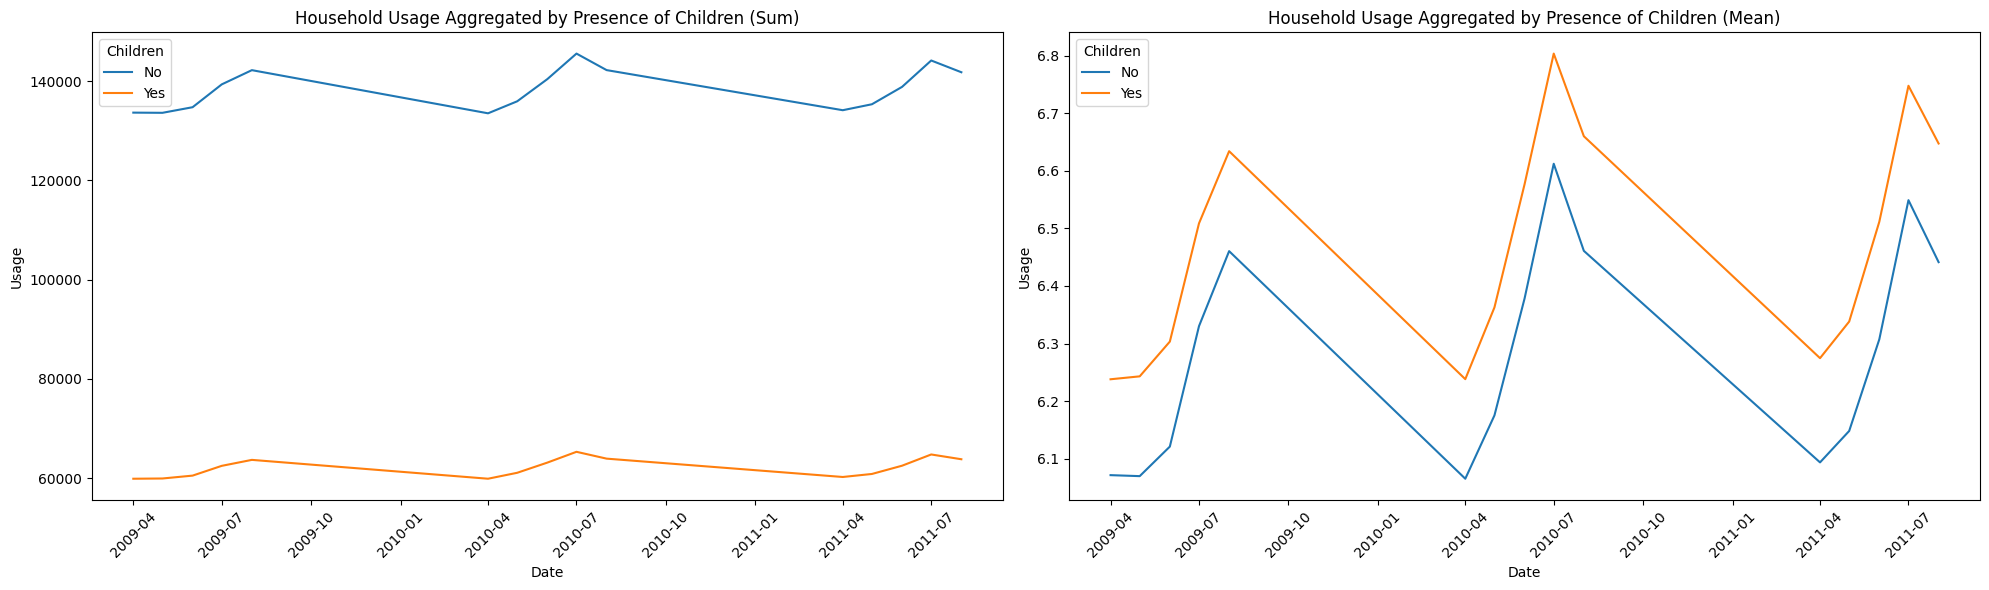

In [65]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=True)

ts_aggregated_sum = ts.groupby(['children', 'date'])['usage'].sum().reset_index()

children_labels = {0: 'No', 1: 'Yes'}

for hh in ts_aggregated_sum['children'].unique():
    hh_data = ts_aggregated_sum[ts_aggregated_sum['children'] == hh]
    ax1.plot(hh_data['date'], hh_data['usage'], label=children_labels[hh])

ax1.set_title('Household Usage Aggregated by Presence of Children (Sum)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Usage')
ax1.legend(title='Children')
ax1.tick_params(axis='x', rotation=45)

ts_aggregated_mean = ts.groupby(['children', 'date'])['usage'].mean().reset_index()

for hh in ts_aggregated_mean['children'].unique():
    hh_data = ts_aggregated_mean[ts_aggregated_mean['children'] == hh]
    ax2.plot(hh_data['date'], hh_data['usage'], label=children_labels[hh])

ax2.set_title('Household Usage Aggregated by Presence of Children (Mean)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Usage')
ax2.legend(title='Children')
ax2.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


Grouping by presence of children also yields similar results, however it can be noticed that while the usage of electricity is not extremely different on average among the two groups, childless households are simply way more prevalent and heavily inflate the sum.

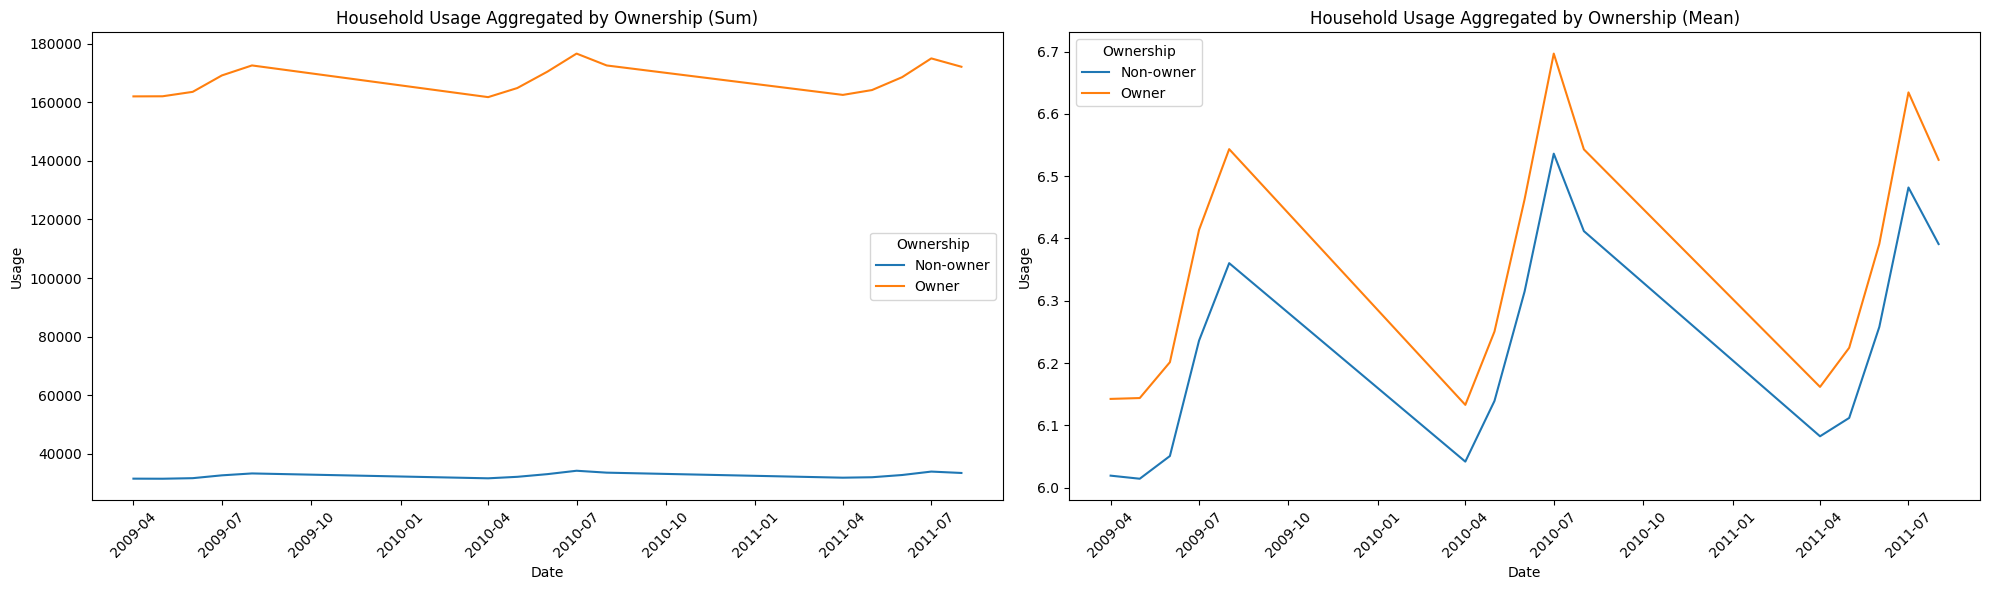

In [66]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=True)

ts_aggregated_sum = ts.groupby(['owner', 'date'])['usage'].sum().reset_index()

owner_labels = {0: 'Non-owner', 1: 'Owner'}

for owner in ts_aggregated_sum['owner'].unique():
    owner_data = ts_aggregated_sum[ts_aggregated_sum['owner'] == owner]
    ax1.plot(owner_data['date'], owner_data['usage'], label=owner_labels[owner])

ax1.set_title('Household Usage Aggregated by Ownership (Sum)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Usage')
ax1.legend(title='Ownership')
ax1.tick_params(axis='x', rotation=45)

ts_aggregated_mean = ts.groupby(['owner', 'date'])['usage'].mean().reset_index()

for owner in ts_aggregated_mean['owner'].unique():
    owner_data = ts_aggregated_mean[ts_aggregated_mean['owner'] == owner]
    ax2.plot(owner_data['date'], owner_data['usage'], label=owner_labels[owner])

ax2.set_title('Household Usage Aggregated by Ownership (Mean)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Usage')
ax2.legend(title='Ownership')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()


The points I made earlier also apply here but it can also be assumed that non-owners try to consume less energy on average since they already have to spend money on rent.

In [67]:
median_size = ts['size'].median()

ts['size_group'] = (ts['size'] >= median_size).astype(int)

print(ts['size_group'].value_counts())

size_group
1    237075
0    237060
Name: count, dtype: int64


I created a new column to see how splitting the dataset equally in 2 groups based on the size of their house would affect the distribution of the time series.

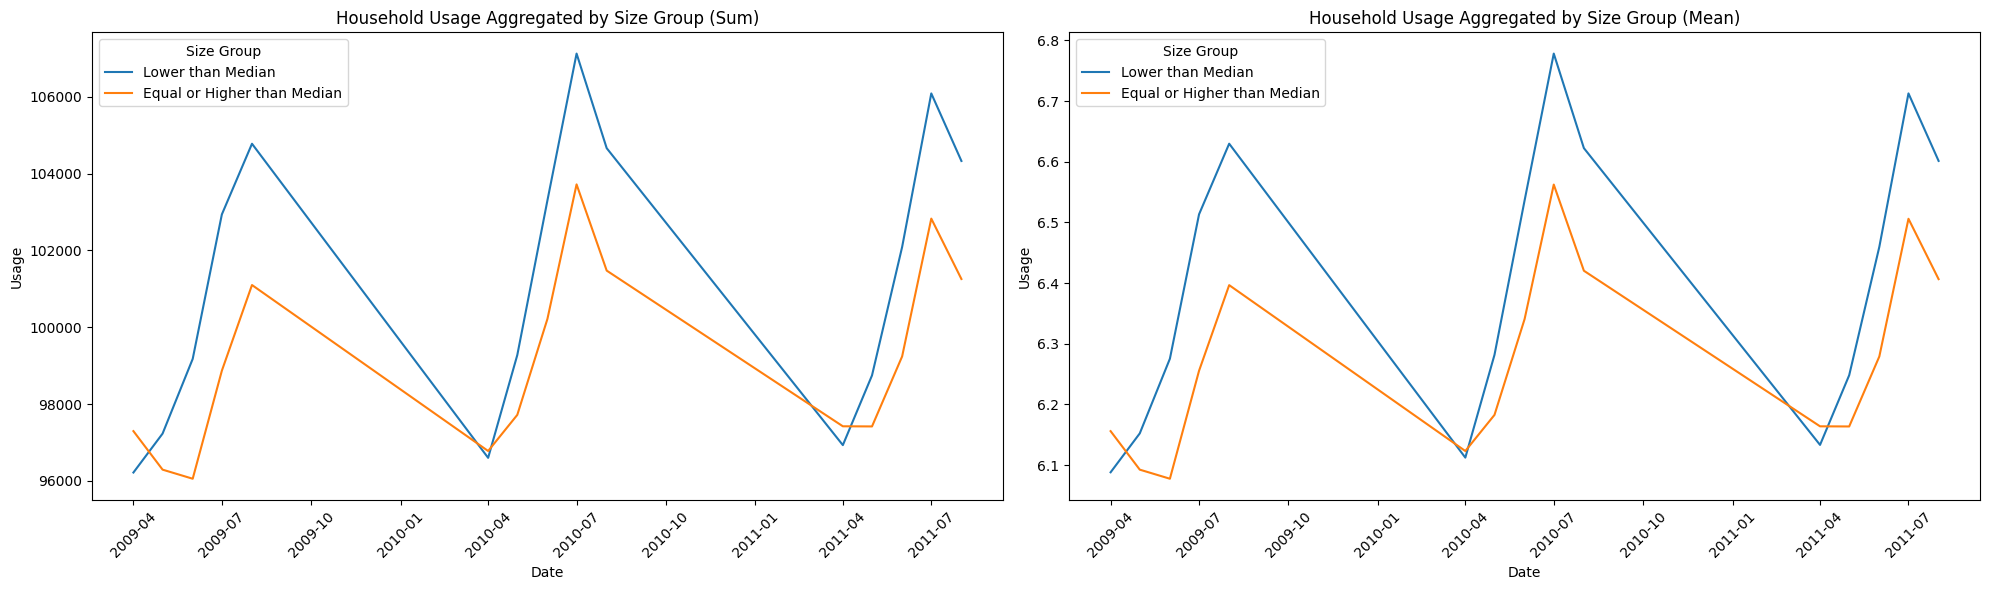

In [68]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=True)

ts_aggregated_sum = ts.groupby(['size_group', 'date'])['usage'].sum().reset_index()

size_group_labels = {0: 'Lower than Median', 1: 'Equal or Higher than Median'}

for size_group in ts_aggregated_sum['size_group'].unique():
    size_group_data = ts_aggregated_sum[ts_aggregated_sum['size_group'] == size_group]
    ax1.plot(size_group_data['date'], size_group_data['usage'], label=size_group_labels[size_group])

ax1.set_title('Household Usage Aggregated by Size Group (Sum)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Usage')
ax1.legend(title='Size Group')
ax1.tick_params(axis='x', rotation=45)

ts_aggregated_mean = ts.groupby(['size_group', 'date'])['usage'].mean().reset_index()

for size_group in ts_aggregated_mean['size_group'].unique():
    size_group_data = ts_aggregated_mean[ts_aggregated_mean['size_group'] == size_group]
    ax2.plot(size_group_data['date'], size_group_data['usage'], label=size_group_labels[size_group])

ax2.set_title('Household Usage Aggregated by Size Group (Mean)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Usage')
ax2.legend(title='Size Group')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

Among the binary groups, size presents the most discrepancies in terms of average, however it can be seen that fitting the time series in two almost perfectly equal size groups reduces the discrepancies between sum aggregations.

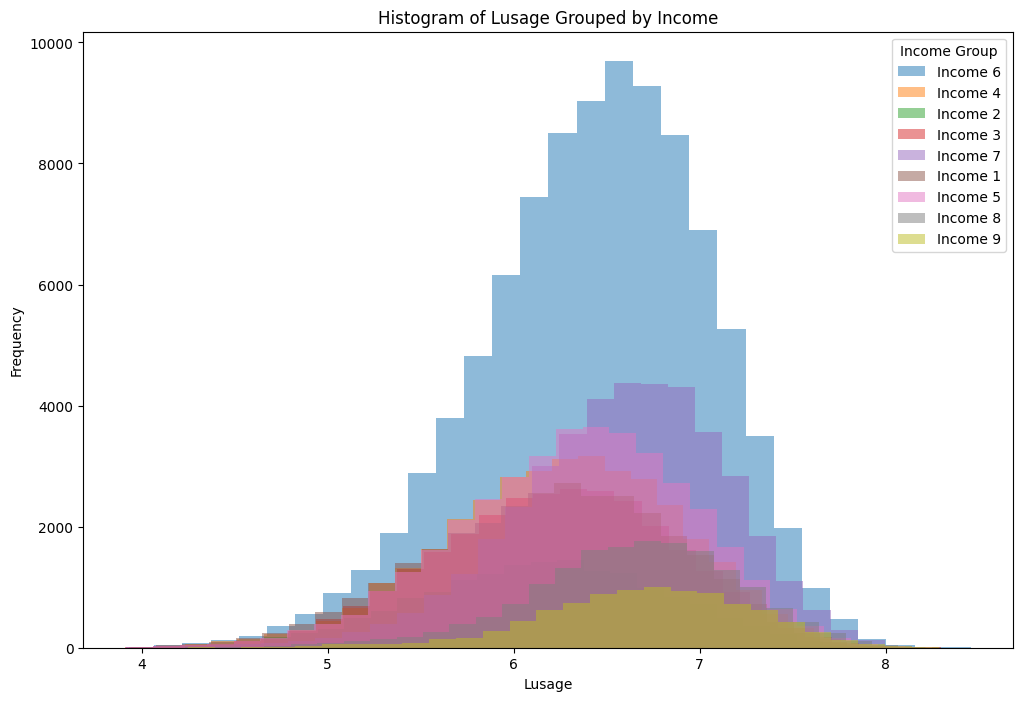

In [69]:
plt.figure(figsize=(12, 8))

income_groups = df['income'].unique()

for income in income_groups:
    subset = df[df['income'] == income]
    plt.hist(subset['lusage'], bins=30, alpha=0.5, label=f'Income {income}')

plt.xlabel('Lusage')
plt.ylabel('Frequency')
plt.title('Histogram of Lusage Grouped by Income')
plt.legend(title='Income Group')

plt.show()

I created a histogram of the data grouped by income to better showcase how the aggregated sum of income 5 has by far the largest value despite the fact that there are 4 income groups higher than 5.

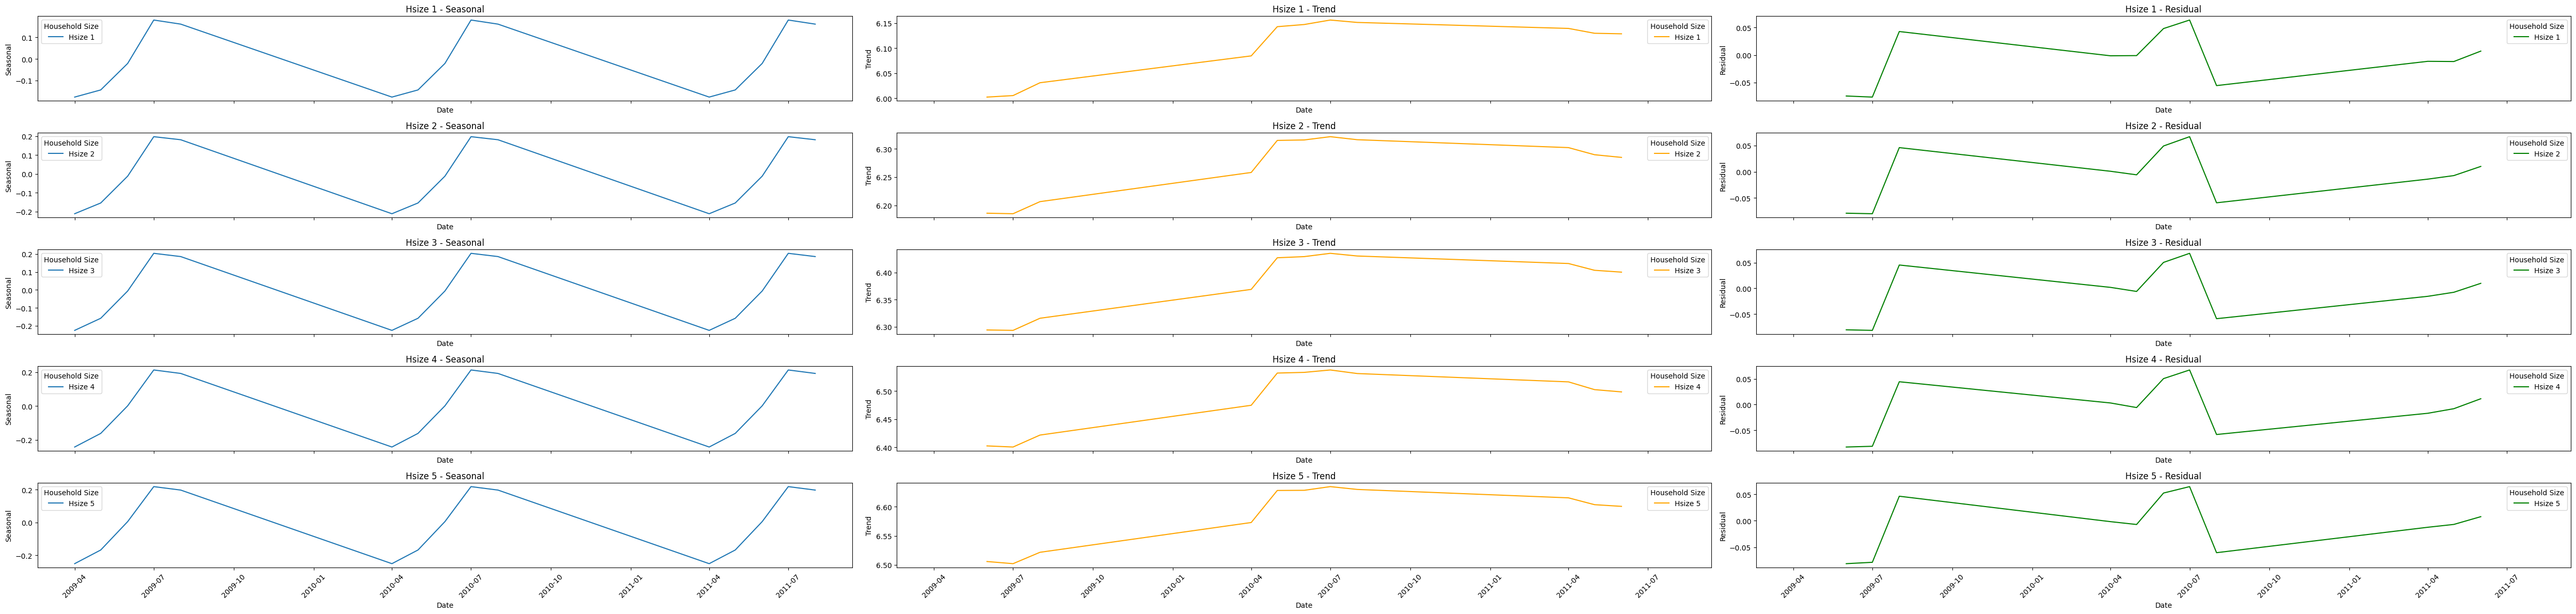

In [70]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

ts_aggregated_mean = ts.groupby(['hsize', 'date'])['usage'].mean().reset_index()

unique_hsizes = ts_aggregated_mean['hsize'].unique()
n_hsizes = len(unique_hsizes)


nrows = 5
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(50, 12), sharex=True)

axes = axes.flatten()

for i, hsize in enumerate(unique_hsizes):
    hsize_data = ts_aggregated_mean[ts_aggregated_mean['hsize'] == hsize]
    hsize_data.set_index('date', inplace=True)
    hsize_series = hsize_data['usage']
    try:

        result = seasonal_decompose(hsize_series, model='additive', period=5)
        seasonal = result.seasonal
        trend = result.trend
        residual = result.resid

        axes[3 * i].plot(seasonal.index, seasonal, label=f'Hsize {hsize}')
        axes[3 * i].set_title(f'Hsize {hsize} - Seasonal')
        axes[3 * i].set_xlabel('Date')
        axes[3 * i].set_ylabel('Seasonal')
        axes[3 * i].tick_params(axis='x', rotation=45)
        axes[3 * i].legend(title='Household Size')

        axes[3 * i + 1].plot(trend.index, trend, label=f'Hsize {hsize}', color='orange')
        axes[3 * i + 1].set_title(f'Hsize {hsize} - Trend')
        axes[3 * i + 1].set_xlabel('Date')
        axes[3 * i + 1].set_ylabel('Trend')
        axes[3 * i + 1].tick_params(axis='x', rotation=45)
        axes[3 * i + 1].legend(title='Household Size')

        axes[3 * i + 2].plot(residual.index, residual, label=f'Hsize {hsize}', color='green')
        axes[3 * i + 2].set_title(f'Hsize {hsize} - Residual')
        axes[3 * i + 2].set_xlabel('Date')
        axes[3 * i + 2].set_ylabel('Residual')
        axes[3 * i + 2].tick_params(axis='x', rotation=45)
        axes[3 * i + 2].legend(title='Household Size')

    except ValueError as e:
        axes[3 * i].text(0.5, 0.5, f'Insufficient data for Hsize {hsize}',
                         ha='center', va='center', fontsize=12, color='red')
        axes[3 * i + 1].axis('off')
        axes[3 * i + 2].axis('off')

for j in range(len(unique_hsizes) * 3, len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.show()


I have decided to use the hsize mean aggregation and grouping for training statistcal models, since this type of grouping reduces both deminsionality and variance between groups.
Here I extracted to trend, seasonal and residual components of the model.

What can be noted is that all the selected groups have near identical components, among those being the presence of clear and strong seasonality.

<ipython-input-71-5e98baeee240>:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_mean = kpss(ts_aggregated_mean['usage'], regression='c')
<ipython-input-71-5e98baeee240>:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_mean = kpss(ts_aggregated_mean['usage'], regression='c')
<ipython-input-71-5e98baeee240>:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_mean = kpss(ts_aggregated_mean['usage'], regression='c')
<ipython-input-71-5e98baeee240>:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater tha

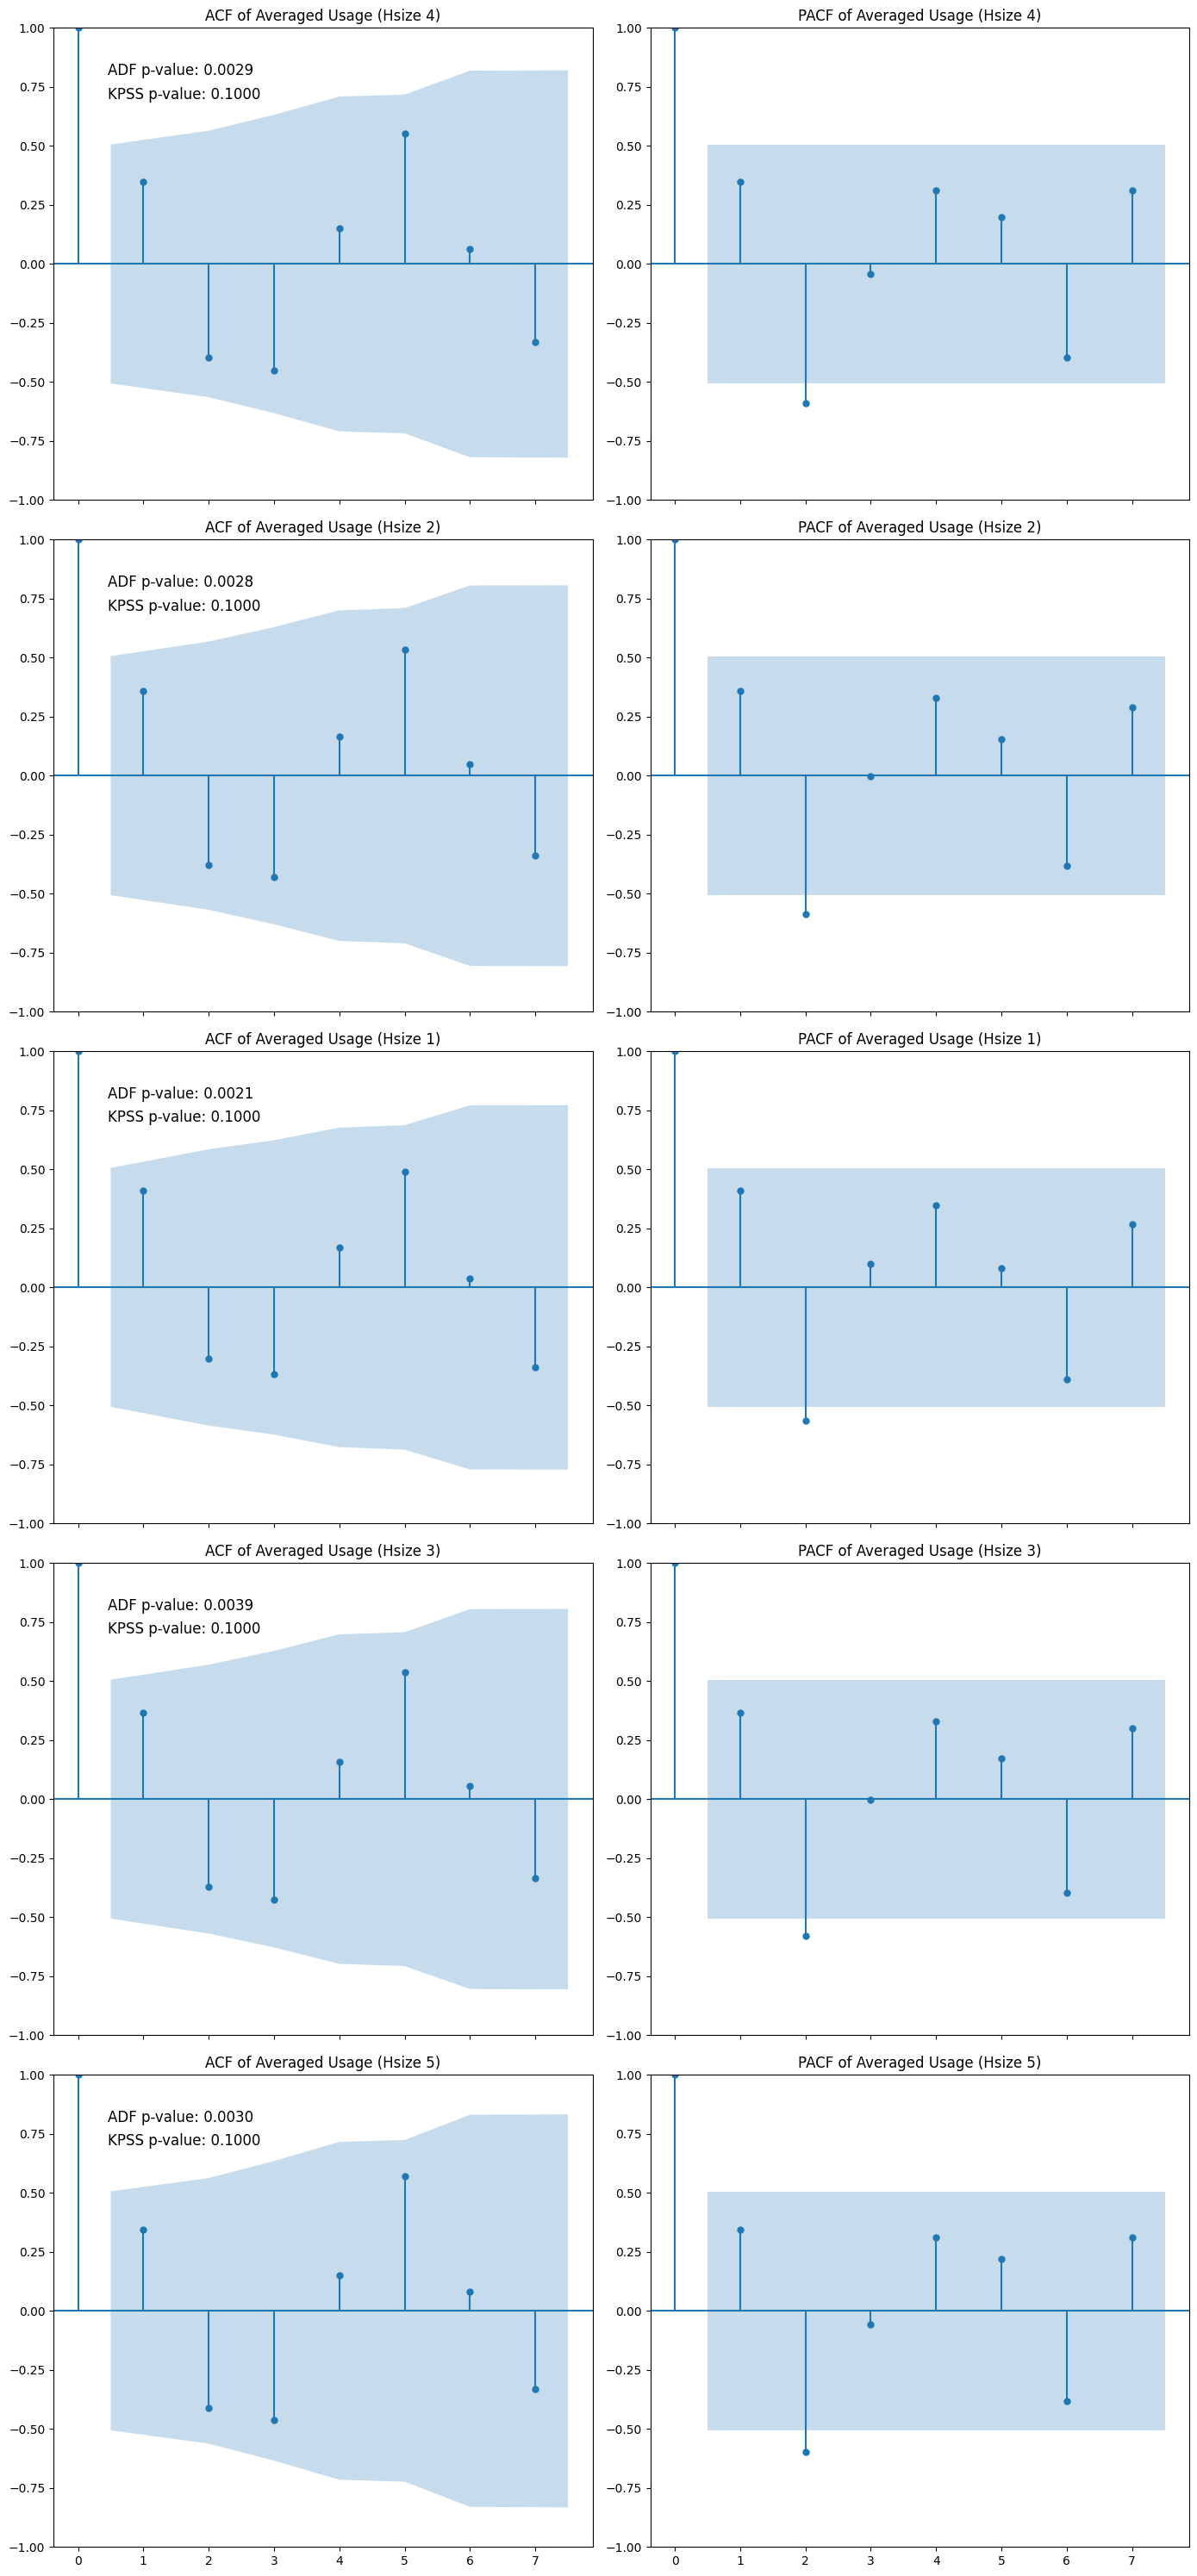

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

unique_hsizes = ts['hsize'].unique()
n_hsizes = len(unique_hsizes)

fig, axes = plt.subplots(nrows=n_hsizes, ncols=2, figsize=(14, 6 * n_hsizes), sharex=True)

if n_hsizes == 1:
    axes = [axes]

for i, hsize in enumerate(unique_hsizes):
    ts_filtered = ts[ts['hsize'] == hsize]

    ts_aggregated_mean = ts_filtered.groupby(['date'])['usage'].mean().reset_index()

    adf_result_mean = adfuller(ts_aggregated_mean['usage'])

    kpss_result_mean = kpss(ts_aggregated_mean['usage'], regression='c')

    plot_acf(ts_aggregated_mean['usage'], ax=axes[i][0], title=f'ACF of Averaged Usage (Hsize {hsize})')
    axes[i][0].text(0.1, 0.9, f'ADF p-value: {adf_result_mean[1]:.4f}', transform=axes[i][0].transAxes, fontsize=12)
    axes[i][0].text(0.1, 0.85, f'KPSS p-value: {kpss_result_mean[1]:.4f}', transform=axes[i][0].transAxes, fontsize=12)

    plot_pacf(ts_aggregated_mean['usage'], ax=axes[i][1], title=f'PACF of Averaged Usage (Hsize {hsize})')

plt.tight_layout()

plt.show()


I did the ADF and KPSS tests on all the hszise relate time series and all had near identical scores, the results of both tests show clear stationarity.
I also plotted ACF and PACF and while they show a strongly autocorrelated initial lag this can be neglected due to the very good pvalues obtained earlier and due the fact each group has only 15 observations.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

ts['date'] = pd.to_datetime(ts['date'])

ts_aggregated_mean = ts.groupby(['hsize', 'date'])['usage'].mean().reset_index()

ts_aggregated_mean_pivot = ts_aggregated_mean.pivot(index='date', columns='hsize', values='usage')

ts_aggregated_mean_pivot.index = pd.DatetimeIndex(ts_aggregated_mean_pivot.index).to_period('D').to_timestamp()

forecasts_hw = {}
actuals = {}
metrics_hw = {}

train_size = 10
test_size = 5

for hsize in ts_aggregated_mean_pivot.columns:
    usage_series = ts_aggregated_mean_pivot[hsize].dropna()

    if len(usage_series) < train_size + test_size:
        continue

    train = usage_series[:train_size]
    test = usage_series[train_size:train_size + test_size]

    holt_add = ExponentialSmoothing(endog=train,
                                    trend='add',
                                    seasonal='add',
                                    seasonal_periods=5).fit()

    forecast_hw = holt_add.predict(start=len(train), end=len(train) + test_size - 1)

    forecasts_hw[hsize] = forecast_hw
    actuals[hsize] = test

    mse_hw = mean_squared_error(test, forecast_hw)
    mae_hw = mean_absolute_error(test, forecast_hw)
    rmse_hw = np.sqrt(mse_hw)

    metrics_hw[hsize] = {'MSE': mse_hw, 'MAE': mae_hw, 'RMSE': rmse_hw}

forecast_hw_df = pd.DataFrame(forecasts_hw)
actual_df = pd.DataFrame(actuals)

forecast_hw_df.index = pd.DatetimeIndex(ts_aggregated_mean_pivot.index[train_size:train_size + test_size])
actual_df.index = forecast_hw_df.index


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

Here i fitted an additive holt winters model, training it on the first 10 observations and then testing it on the last 5.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

forecasts_ma = {}
metrics_ma = {}

window_size = 2

train_size = 10
test_size = 5

for hsize in forecast_hw_df.columns:
    combined_series = pd.concat([forecast_hw_df[hsize], actual_df[hsize]])

    rolling_mean = combined_series.rolling(window=window_size).mean()

    ma_forecast = rolling_mean[-(test_size + window_size):].iloc[-test_size:].values

    forecasts_ma[hsize] = ma_forecast

    test = actual_df[hsize].values

    mse_ma = mean_squared_error(test, ma_forecast)
    mae_ma = mean_absolute_error(test, ma_forecast)
    rmse_ma = np.sqrt(mse_ma)

    metrics_ma[hsize] = {'MSE': mse_ma, 'MAE': mae_ma, 'RMSE': rmse_ma}


forecast_ma_df = pd.DataFrame(forecasts_ma)

forecast_ma_df.index = pd.DatetimeIndex(forecast_hw_df.index[-test_size:])


Here I implemented a moving average with a window size of 2, "training" it on the first 10 obs and testing it on the last 5

In [74]:
from statsmodels.tsa.api import SimpleExpSmoothing

forecasts_ses = {}
metrics_ses = {}

for hsize in ts_aggregated_mean_pivot.columns:
    usage_series = ts_aggregated_mean_pivot[hsize].dropna()

    if len(usage_series) < train_size + test_size:
        continue

    train = usage_series[:train_size]
    test = usage_series[train_size:train_size + test_size]

    ses_model = SimpleExpSmoothing(train).fit()

    forecast_ses = ses_model.forecast(test_size)

    forecasts_ses[hsize] = forecast_ses
    actuals[hsize] = test

    mse_ses = mean_squared_error(test, forecast_ses)
    mae_ses = mean_absolute_error(test, forecast_ses)
    rmse_ses = np.sqrt(mse_ses)

    metrics_ses[hsize] = {'MSE': mse_ses, 'MAE': mae_ses, 'RMSE': rmse_ses}

forecast_ses_df = pd.DataFrame(forecasts_ses)

forecast_ses_df.index = pd.DatetimeIndex(ts_aggregated_mean_pivot.index[train_size:train_size + test_size])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

Here i implemented a SES model, again with a 10/5 split.

In [75]:
from scipy import stats

def diebold_mariano(y_true, y_pred1, y_pred2, h=1):

    e1 = y_true - y_pred1
    e2 = y_true - y_pred2

    d = (e1 ** 2 - e2 ** 2) ** 2

    d_mean = np.mean(d)
    d_var = np.var(d, ddof=1)

    dm_stat = d_mean / np.sqrt(d_var / len(d))

    p_value = 2 * (1 - stats.norm.cdf(np.abs(dm_stat)))

    return dm_stat, p_value

dm_results = {}

for hsize in forecast_hw_df.columns:
    actual = actual_df[hsize].dropna()
    forecast_hw = forecast_hw_df[hsize].reindex(actual.index).dropna()
    forecast_ma = forecast_ma_df[hsize].reindex(actual.index).dropna()
    forecast_ses = forecast_ses_df[hsize].reindex(actual.index).dropna()

    common_index = actual.index.intersection(forecast_hw.index).intersection(forecast_ma.index).intersection(forecast_ses.index)

    actual = actual.loc[common_index]
    forecast_hw = forecast_hw.loc[common_index]
    forecast_ma = forecast_ma.loc[common_index]
    forecast_ses = forecast_ses.loc[common_index]

    dm_hw_ma = diebold_mariano(actual, forecast_hw, forecast_ma)
    dm_hw_ses = diebold_mariano(actual, forecast_hw, forecast_ses)
    dm_ma_ses = diebold_mariano(actual, forecast_ma, forecast_ses)

    dm_results[hsize] = {
        'HW vs MA': dm_hw_ma,
        'HW vs SES': dm_hw_ses,
        'MA vs SES': dm_ma_ses
    }

print(dm_results)

{1: {'HW vs MA': (2.6003215601357548, 0.00931364421538694), 'HW vs SES': (2.07447309112579, 0.03803539532713485), 'MA vs SES': (1.2816458297187707, 0.19996691558780455)}, 2: {'HW vs MA': (2.1949742518482513, 0.02816544478682448), 'HW vs SES': (1.7600395715544366, 0.07840109734381229), 'MA vs SES': (1.4597261299643751, 0.14436535752594293)}, 3: {'HW vs MA': (2.1126367684624747, 0.034631869142525806), 'HW vs SES': (1.6572893766567756, 0.09746098405546011), 'MA vs SES': (1.5058380115890713, 0.13210876273872607)}, 4: {'HW vs MA': (1.9573654743583677, 0.05030451466194896), 'HW vs SES': (1.5631774478710572, 0.11801086306736952), 'MA vs SES': (1.567046231210396, 0.11710388581453568)}, 5: {'HW vs MA': (1.608097700394743, 0.10781378278613163), 'HW vs SES': (1.517300350275031, 0.12919086982500216), 'MA vs SES': (1.5794811859269218, 0.1142257285843351)}}


I performed the diebold mariano test to see if there is a significant difference between the predictions made with the three models and while the difference between MA and SES is negligable, the one between HW additive and MA is quite significant.

In [76]:
from statsmodels.tsa.stattools import adfuller, kpss
residuals = holt_add.resid
adf_result = adfuller(residuals.dropna())
adf_stat, adf_pvalue, adf_used_lag, adf_nobs, adf_critical_values, adf_icbest = adf_result

kpss_result = kpss(residuals.dropna(), regression='c')
kpss_stat, kpss_pvalue, kpss_lags, kpss_critical_values = kpss_result

print('ADF Statistic:', adf_stat)
print('ADF p-value:', adf_pvalue)
print('ADF Critical Values:', adf_critical_values)

print('KPSS Statistic:', kpss_stat)
print('KPSS p-value:', kpss_pvalue)
print('KPSS Critical Values:', kpss_critical_values)

residuals_ma = {}
for hsize in forecast_hw_df.columns:
    actual_test = actual_df[hsize].values[-test_size:]
    ma_forecast = forecasts_ma[hsize]

    residuals_ma[hsize] = actual_test - ma_forecast

residuals_ma_df = pd.DataFrame(residuals_ma)
residuals_ma_df.index = pd.DatetimeIndex(forecast_hw_df.index[-test_size:])
for hsize in residuals_ma_df.columns:
    residuals = residuals_ma_df[hsize].dropna()

    adf_result = adfuller(residuals)
    adf_stat, adf_pvalue, adf_used_lag, adf_nobs, adf_critical_values, adf_icbest = adf_result

    kpss_result = kpss(residuals, regression='c')
    kpss_stat, kpss_pvalue, kpss_lags, kpss_critical_values = kpss_result

    print(f'Residuals for hsize {hsize}:')
    print('ADF Statistic:', adf_stat)
    print('ADF p-value:', adf_pvalue)
    print('ADF Critical Values:', adf_critical_values)
    print('KPSS Statistic:', kpss_stat)
    print('KPSS p-value:', kpss_pvalue)
    print('KPSS Critical Values:', kpss_critical_values)
    print()

ADF Statistic: -2.9310896970415525
ADF p-value: 0.04185030050500058
ADF Critical Values: {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}
KPSS Statistic: 0.08239818926949871
KPSS p-value: 0.1
KPSS Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Residuals for hsize 1:
ADF Statistic: -3.157612715069288
ADF p-value: 0.02257310177163764
ADF Critical Values: {'1%': -7.355440625, '5%': -4.474365000000001, '10%': -3.1269325}
KPSS Statistic: 0.2569530610955069
KPSS p-value: 0.1
KPSS Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Residuals for hsize 2:
ADF Statistic: -3.390607467923103
ADF p-value: 0.011283260163922545
ADF Critical Values: {'1%': -7.355440625, '5%': -4.474365000000001, '10%': -3.1269325}
KPSS Statistic: 0.2468336013462239
KPSS p-value: 0.1
KPSS Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Residuals for hsize 3:
ADF Statistic: -3.5601770254558627
ADF p-value: 0.0065696

<ipython-input-76-8993989b58ff>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(residuals.dropna(), regression='c')
<ipython-input-76-8993989b58ff>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(residuals, regression='c')
<ipython-input-76-8993989b58ff>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(residuals, regression='c')
<ipython-input-76-8993989b58ff>:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(residuals, regr

I performed stationarity checks on the residues of the three models and they all seem to be a good fit, both ADF and KPSS showing stationarity at a 99% confidence interval.

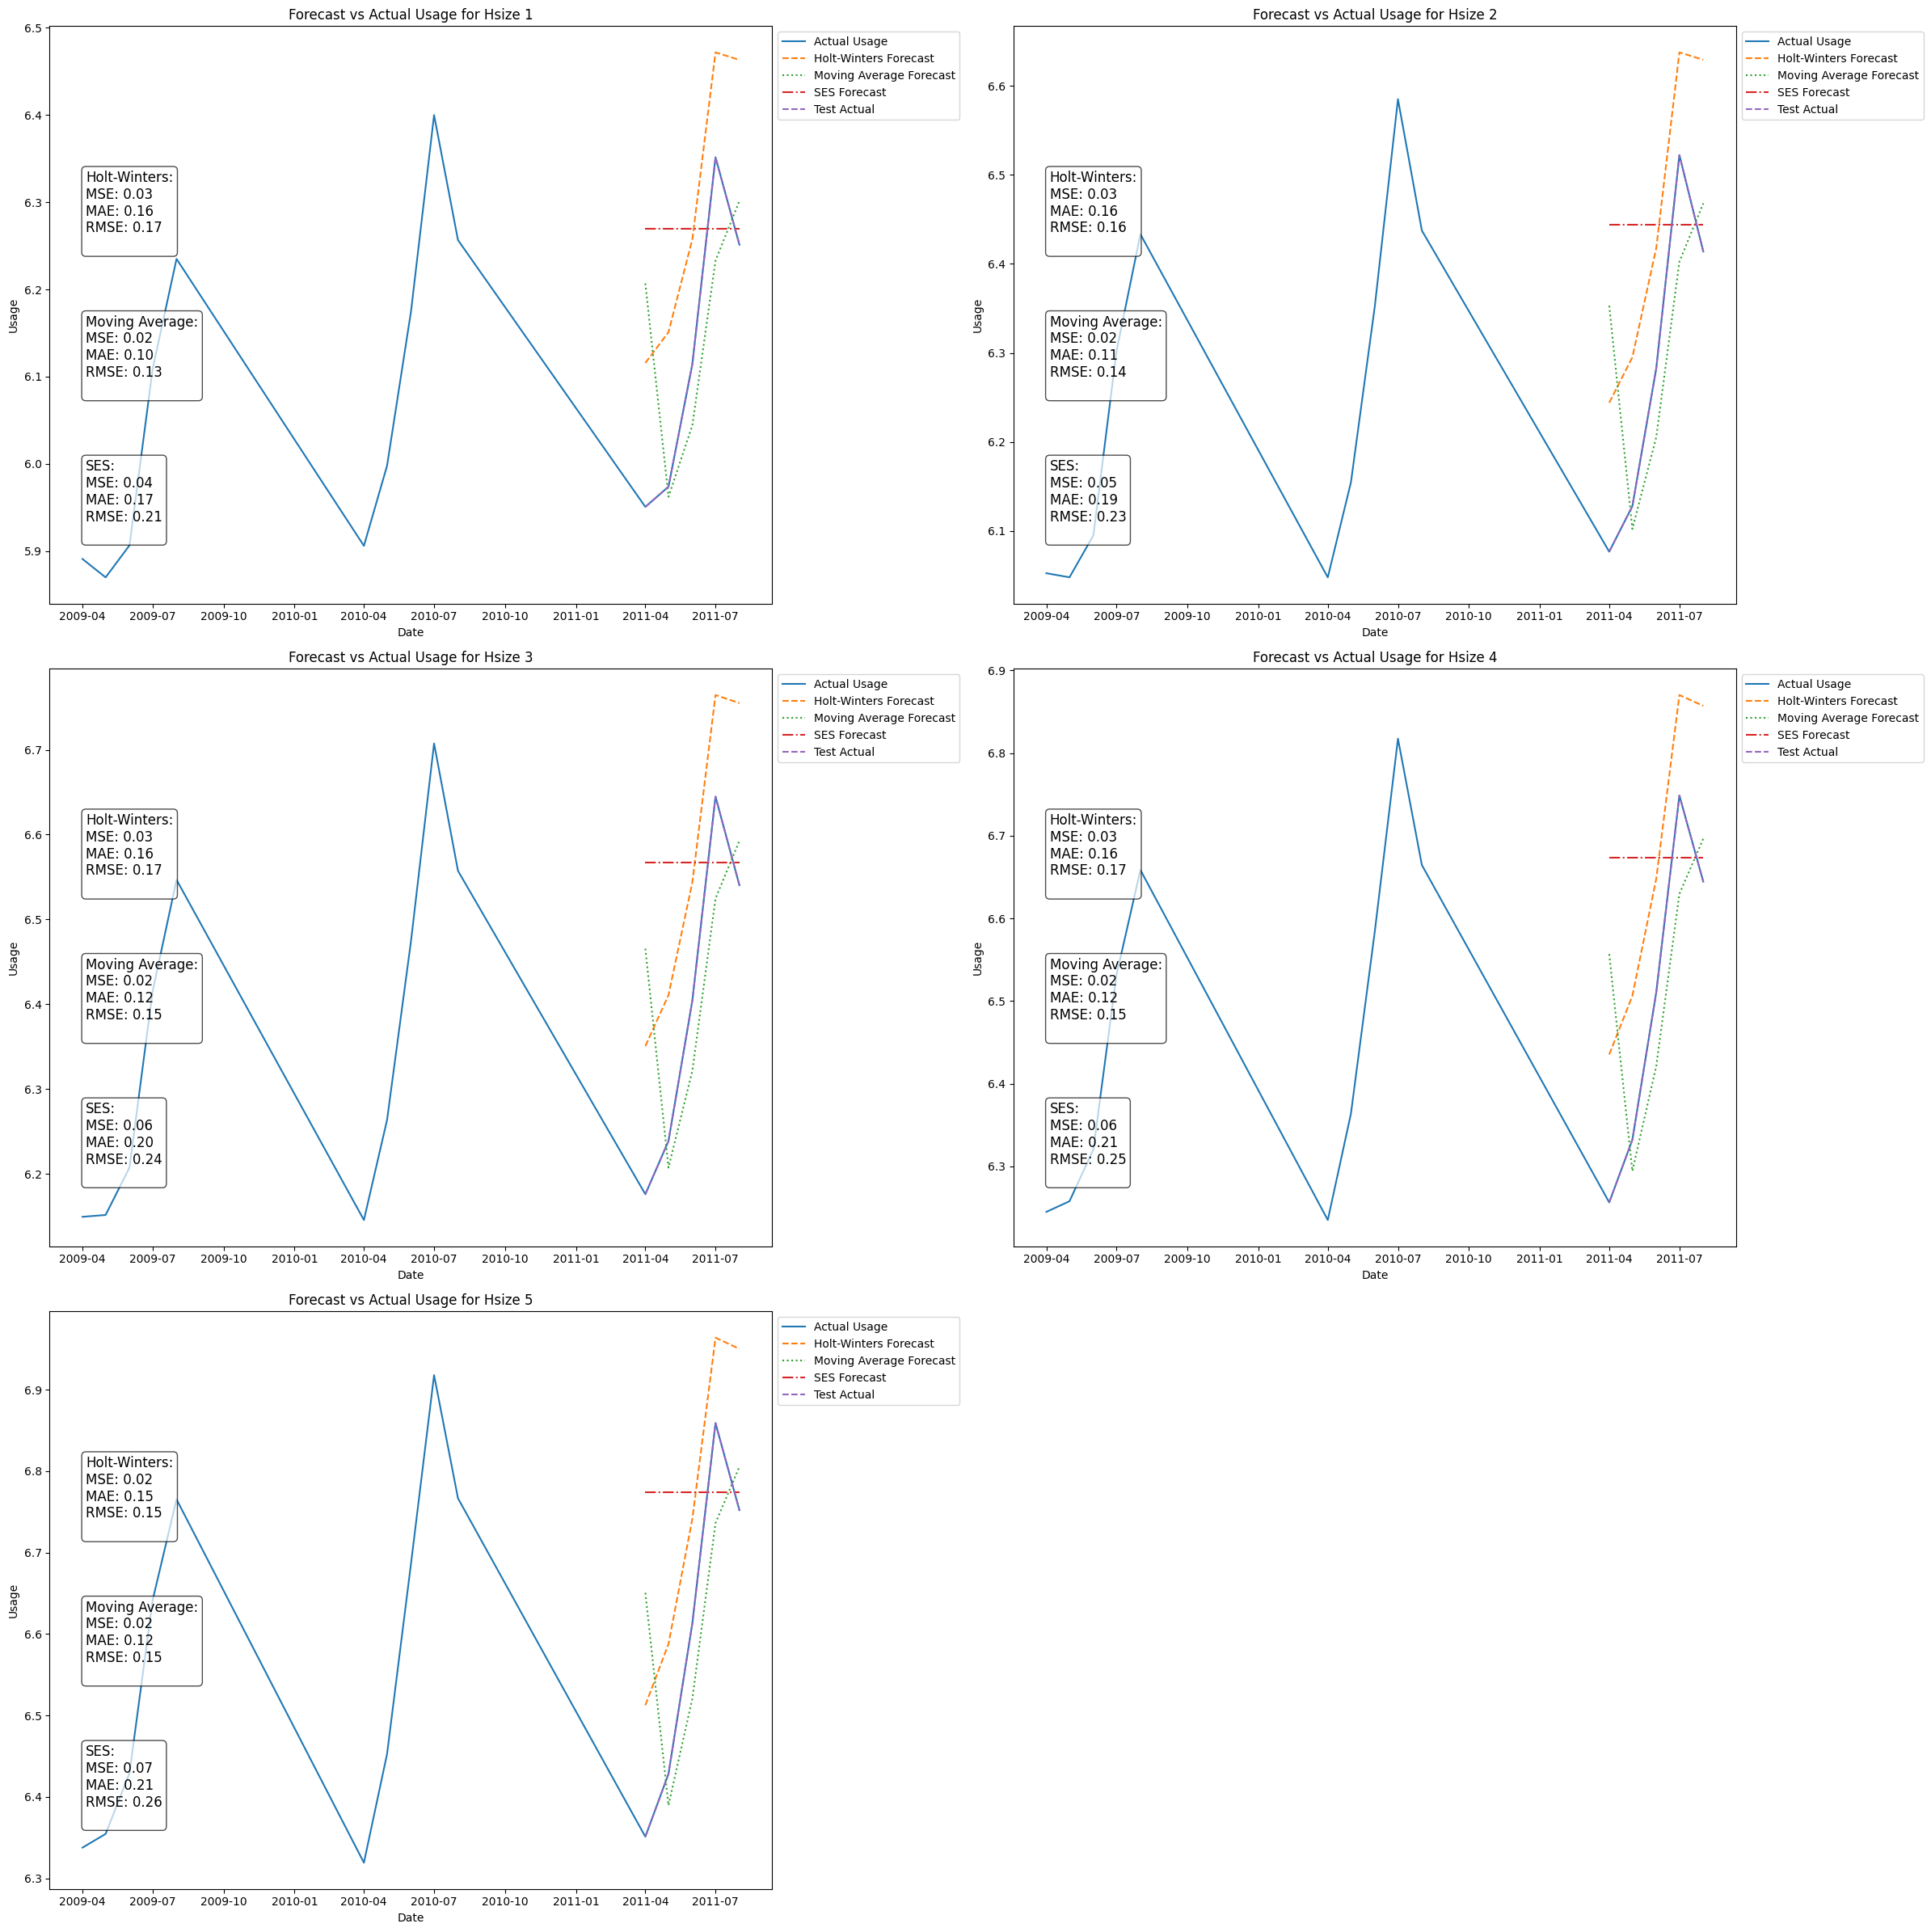

In [77]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 24))

axes = axes.flatten()

for i, hsize in enumerate(forecast_hw_df.columns):
    ax = axes[i]
    actual_usage = ts_aggregated_mean_pivot[hsize]
    forecast_hw_usage = forecast_hw_df[hsize]
    forecast_ma_usage = forecast_ma_df[hsize]
    forecast_ses_usage = forecast_ses_df[hsize]
    actual_test = actual_df[hsize]

    ax.plot(actual_usage.index, actual_usage, label='Actual Usage', linestyle='-')

    ax.plot(forecast_hw_usage.index, forecast_hw_usage, label='Holt-Winters Forecast', linestyle='--')

    ax.plot(forecast_ma_usage.index, forecast_ma_usage, label='Moving Average Forecast', linestyle=':')

    ax.plot(forecast_ses_usage.index, forecast_ses_usage, label='SES Forecast', linestyle='-.')

    ax.plot(actual_test.index, actual_test, label='Test Actual', linestyle='--')

    metrics_text_hw = (f"Holt-Winters:\n"
                       f"MSE: {metrics_hw[hsize]['MSE']:.2f}\n"
                       f"MAE: {metrics_hw[hsize]['MAE']:.2f}\n"
                       f"RMSE: {metrics_hw[hsize]['RMSE']:.2f}\n"
                      )

    metrics_text_ma = (f"Moving Average:\n"
                       f"MSE: {metrics_ma[hsize]['MSE']:.2f}\n"
                       f"MAE: {metrics_ma[hsize]['MAE']:.2f}\n"
                       f"RMSE: {metrics_ma[hsize]['RMSE']:.2f}\n"
                       )

    metrics_text_ses = (f"SES:\n"
                        f"MSE: {metrics_ses[hsize]['MSE']:.2f}\n"
                        f"MAE: {metrics_ses[hsize]['MAE']:.2f}\n"
                        f"RMSE: {metrics_ses[hsize]['RMSE']:.2f}\n"
                       )

    ax.text(0.05, 0.75, metrics_text_hw, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    ax.text(0.05, 0.50, metrics_text_ma, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    ax.text(0.05, 0.25, metrics_text_ses, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    ax.set_title(f'Forecast vs Actual Usage for Hsize {hsize}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Usage')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

for j in range(len(forecast_hw_df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


As it can be seen I plotted the test results of the 3 models as well as their performance metrics, SES performed the worst, while HW and MA had a similar performance, however HW takes seasonality in account and is generally a bit more complex so I think it would overfit less than MA.

The only model of these 3 which I will use for forecasting is Holt Winters.

# Reasoning on my model choice

Given the fact each household only had 15 recorded observations, I simply couldn't use any univariate statistical model more complex than those I showcassed above, let alone make use of the many variables the dataset has.

I didn't stop here however, I also wanted to attempt making predictions with a machine learning model, but first I had to study the link between variables.

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

ts = ts.dropna()
X = ts.loc[:, ts.columns.difference(['size_group', 'zipcode', 'hh_id','date','usage'])]
y = ts['usage']
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print(regr.coef_)

Index(['children', 'hsize', 'income', 'owner', 'size'], dtype='object')
[ 7.22253837e-02  9.21802921e-02  6.22610319e-02 -8.11627198e-02
 -1.81923288e-05]


The coefficents are extremely low, thus irrelevant.

In [79]:
columns_to_keep = ['usage','size', 'hsize', 'income', 'children', 'owner']

ts_selected = ts[columns_to_keep]


print(ts_selected.head(5))

corr = ts_selected.corr()

corr.style.background_gradient(cmap='coolwarm')

      usage          size  hsize  income  children  owner
0  6.505642  12429.794637      4       6       1.0    1.0
1  6.388161  12429.794637      4       6       1.0    1.0
2  6.207919  12429.794637      4       6       1.0    1.0
3  6.439571  12429.794637      4       6       1.0    1.0
4  6.651676  12429.794637      4       6       1.0    1.0


Further looking at the correlation heatmap, the link between usage and the other variables seems to be insignificant.

In [80]:
usage_ts = ts.iloc[:, [7, 8]].copy()
print(usage_ts.head(5))
usage_ts['date'] = pd.to_datetime(usage_ts['date'], format='%Y-%m-%d')

usage_ts.set_index("date", inplace=True)
print(usage_ts.head(5))

        date     usage
0 2009-04-01  6.505642
1 2009-05-01  6.388161
2 2009-06-01  6.207919
3 2009-07-01  6.439571
4 2009-08-01  6.651676
               usage
date                
2009-04-01  6.505642
2009-05-01  6.388161
2009-06-01  6.207919
2009-07-01  6.439571
2009-08-01  6.651676


# Building a LSTM model
Only univariate forecasting seems to be fitting for this time series and for that reason, I thought the best fit would be a LSTM model.

In [81]:
def prepare_dataframe_for_lstm(dataframe, n_steps):
    dataframe = dataframe.copy()

    for i in range(1, n_steps+1):
        dataframe[f'usage(t-{i})'] = dataframe['usage'].shift(i)

    dataframe.dropna(inplace=True)

    return dataframe


lookback = 14
shifted_df = prepare_dataframe_for_lstm(usage_ts, lookback)
shifted_df

usage  usage(t-1)  usage(t-2)  usage(t-3)  usage(t-4)  \
date                                                                   
2011-08-01  6.699666    6.730977    6.625392    6.486542    6.456377   
2009-04-01  5.894181    6.699666    6.730977    6.625392    6.486542   
2009-05-01  5.868767    5.894181    6.699666    6.730977    6.625392   
2009-06-01  6.061255    5.868767    5.894181    6.699666    6.730977   
2009-07-01  6.506459    6.061255    5.868767    5.894181    6.699666   
...              ...         ...         ...         ...         ...   
2011-04-01  6.791299    6.920894    7.083414    7.037539    6.870087   
2011-05-01  6.949129    6.791299    6.920894    7.083414    7.037539   
2011-06-01  7.010714    6.949129    6.791299    6.920894    7.083414   
2011-07-01  7.193545    7.010714    6.949129    6.791299    6.920894   
2011-08-01  7.173882    7.193545    7.010714    6.949129    6.791299   

            usage(t-5)  usage(t-6)  usage(t-7)  usage(t-8)  usage(t-9)  \
date                                                                     
2011-08-01    6.966908    6.967286    6.696693    6.510683    6.322805   
2009-04-01    6.456377    6.966908    6.967286    6.696693    6.510683   
2009-05-01    6.486542    6.456377    6.966908    6.967286    6.696693   
2009-06-01    6.625392    6.486542    6.456377    6.966908    6.967286   
2009-07-01    6.730977    6.625392    6.486542    6.456377    6.966908   
...                ...         ...         ...         ...         ...   
2011-04-01    6.727795    7.011101    6.955112    6.800592    6.721847   
2011-05-01    6.870087    6.727795    7.011101    6.955112    6.800592   
2011-06-01    7.037539    6.870087    6.727795    7.011101    6.955112   
2011-07-01    7.083414    7.037539    6.870087    6.727795    7.011101   
2011-08-01    6.920894    7.083414    7.037539    6.870087    6.727795   

            usage(t-10)  usage(t-11)  usage(t-12)  usage(t-13)  usage(t-14)  
date                                                                         
2011-08-01     6.651676     6.439571     6.207919     6.388161     6.505642  
2009-04-01     6.322805     6.651676     6.439571     6.207919     6.388161  
2009-05-01     6.510683     6.322805     6.651676     6.439571     6.207919  
2009-06-01     6.696693     6.510683     6.322805     6.651676     6.439571  
2009-07-01     6.967286     6.696693     6.510683     6.322805     6.651676  
...                 ...          ...          ...          ...          ...  
2011-04-01     6.696123     5.934177     6.172674     6.018116     5.606919  
2011-05-01     6.721847     6.696123     5.934177     6.172674     6.018116  
2011-06-01     6.800592     6.721847     6.696123     5.934177     6.172674  
2011-07-01     6.955112     6.800592     6.721847     6.696123     5.934177  
2011-08-01     7.011101     6.955112     6.800592     6.721847     6.696123  

[474121 rows x 15 columns]

When designing the training dataset, I wanted it to be able to hold all existing observations of a household at a time.

In [82]:
shifted_df_as_np = shifted_df.to_numpy()

print(shifted_df_as_np.shape)

shifted_df_as_np

(474121, 15)


array([[6.699666 , 6.7309771, 6.6253924, ..., 6.2079191, 6.3881612,
        6.5056419],
       [5.8941808, 6.699666 , 6.7309771, ..., 6.4395709, 6.2079191,
        6.3881612],
       [5.8687673, 5.8941808, 6.699666 , ..., 6.6516762, 6.4395709,
        6.2079191],
       ...,
       [7.0107145, 6.9491286, 6.7912989, ..., 6.6961226, 5.9341774,
        6.1726742],
       [7.1935449, 7.0107145, 6.9491286, ..., 6.7218471, 6.6961226,
        5.9341774],
       [7.1738815, 7.1935449, 7.0107145, ..., 6.8005919, 6.7218471,
        6.6961226]])

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[0.59397103, 0.60120386, 0.5768139 , ..., 0.48037797, 0.52201372,
        0.54915165],
       [0.40790473, 0.59397103, 0.60120386, ..., 0.53388931, 0.48037797,
        0.52201372],
       [0.40203424, 0.40790473, 0.59397103, ..., 0.58288543, 0.53388931,
        0.48037797],
       ...,
       [0.66582293, 0.65159665, 0.61513814, ..., 0.59315251, 0.41714391,
        0.47223644],
       [0.70805657, 0.66582293, 0.65159665, ..., 0.59909484, 0.59315251,
        0.41714391],
       [0.70351435, 0.70805657, 0.66582293, ..., 0.61728481, 0.59909484,
        0.59315251]])

In [84]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((474121, 14), (474121,))

In [85]:
X = np.flip(X, axis=1).copy()
X

array([[0.54915165, 0.52201372, 0.48037797, ..., 0.54473952, 0.5768139 ,
        0.60120386],
       [0.52201372, 0.48037797, 0.53388931, ..., 0.5768139 , 0.60120386,
        0.59397103],
       [0.48037797, 0.53388931, 0.58288543, ..., 0.60120386, 0.59397103,
        0.40790473],
       ...,
       [0.47223644, 0.41714391, 0.59315251, ..., 0.6450745 , 0.61513814,
        0.65159665],
       [0.41714391, 0.59315251, 0.59909484, ..., 0.61513814, 0.65159665,
        0.66582293],
       [0.59315251, 0.59909484, 0.61728481, ..., 0.65159665, 0.66582293,
        0.70805657]])

In [86]:
split_index = int(len(X) * 0.80)

split_index

379296

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=77)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379296, 14), (94825, 14), (379296,), (94825,))

In [88]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379296, 14, 1), (94825, 14, 1), (379296, 1), (94825, 1))

In [89]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch.optim as optimal_lags
from torch.utils.data import Dataset, DataLoader
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([379296, 14, 1]),
 torch.Size([94825, 14, 1]),
 torch.Size([379296, 1]),
 torch.Size([94825, 1]))

In [90]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [91]:
from torch.utils.data import DataLoader

batch_size = 50

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [92]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([50, 14, 1]) torch.Size([50, 1])


In [93]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 3, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 3, batch_first=True)
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [94]:
train_loss = {}

def train_one_epoch(modelType, optimizer):
    modelType.train(True)
    running_loss = 0.0
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = modelType(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index + 1, avg_loss_across_batches))
            running_loss = 0.0
    print()
    return running_loss / len(train_loader)

In [95]:
val_loss = {}

def validate_one_epoch(modelType):
    modelType.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = modelType(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()
    return avg_loss_across_batches


In [96]:
def train_and_validate(modelType, optimizer, num_epochs):
    train_loss = {}
    val_loss = {}
    for epoch in range(num_epochs):
      print(f'Epoch: {epoch + 1}')
      train_loss[epoch] = train_one_epoch(modelType, optimizer)
      val_loss[epoch] = validate_one_epoch(modelType)
    return train_loss, val_loss

In [97]:
from torch.utils.data import DataLoader

batch_size = 100

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break
train_loss = {}
val_loss = {}

learning_rate = 0.001
epochs = 2
loss_function = nn.MSELoss()
optimizer_LSTM = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_loss_lstm, val_loss_lstm = train_and_validate(model, optimizer_LSTM, epochs)
print('Model finished training')

torch.Size([100, 14, 1]) torch.Size([100, 1])
Epoch: 1
Batch 100, Loss: 0.164
Batch 200, Loss: 0.023
Batch 300, Loss: 0.018
Batch 400, Loss: 0.017
Batch 500, Loss: 0.016
Batch 600, Loss: 0.015
Batch 700, Loss: 0.014
Batch 800, Loss: 0.013
Batch 900, Loss: 0.011
Batch 1000, Loss: 0.011
Batch 1100, Loss: 0.010
Batch 1200, Loss: 0.010
Batch 1300, Loss: 0.010
Batch 1400, Loss: 0.009
Batch 1500, Loss: 0.010
Batch 1600, Loss: 0.009
Batch 1700, Loss: 0.009
Batch 1800, Loss: 0.009
Batch 1900, Loss: 0.009
Batch 2000, Loss: 0.008
Batch 2100, Loss: 0.009
Batch 2200, Loss: 0.009
Batch 2300, Loss: 0.008
Batch 2400, Loss: 0.008
Batch 2500, Loss: 0.009
Batch 2600, Loss: 0.008
Batch 2700, Loss: 0.008
Batch 2800, Loss: 0.008
Batch 2900, Loss: 0.008
Batch 3000, Loss: 0.008
Batch 3100, Loss: 0.008
Batch 3200, Loss: 0.008
Batch 3300, Loss: 0.008
Batch 3400, Loss: 0.008
Batch 3500, Loss: 0.008
Batch 3600, Loss: 0.008
Batch 3700, Loss: 0.008

Val Loss: 0.007
*************************************************

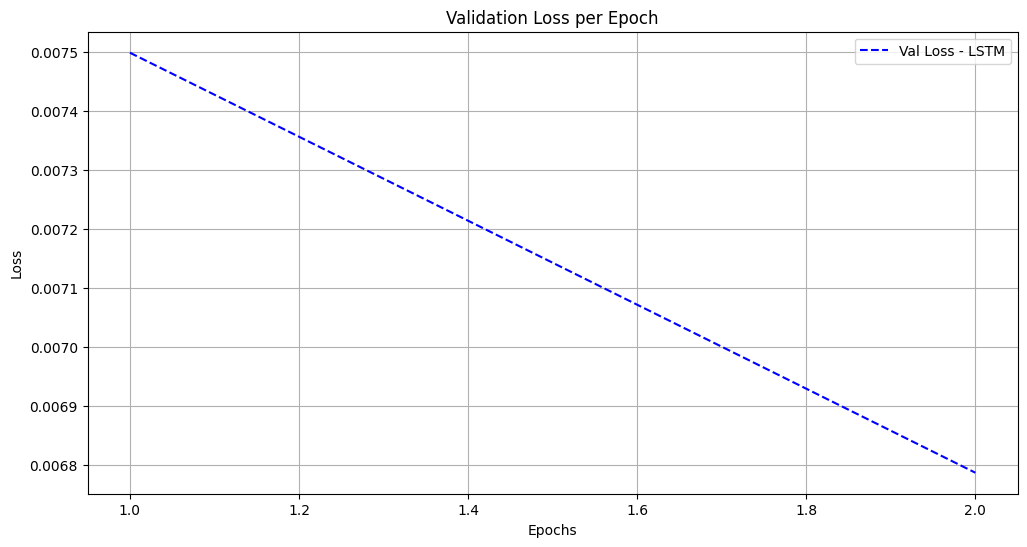

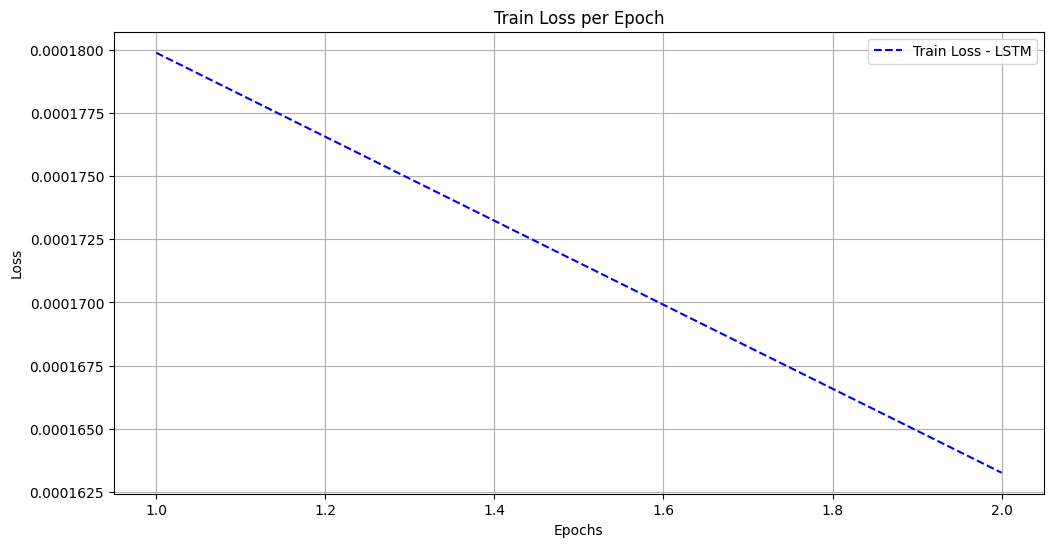

In [98]:
adjusted_train_loss_lstm = {epoch + 1: loss for epoch, loss in train_loss_lstm.items()}
adjusted_val_loss_lstm = {epoch + 1: loss for epoch, loss in val_loss_lstm.items()}

def dict_to_list(dict_data, epochs):
    return [dict_data.get(epoch, None) for epoch in range(1, epochs + 1)]

train_loss_lstm_list = dict_to_list(adjusted_train_loss_lstm, epochs)
val_loss_lstm_list = dict_to_list(adjusted_val_loss_lstm, epochs)

epochs_range = range(1, epochs + 1)
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, val_loss_lstm_list, label='Val Loss - LSTM', color='blue', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, train_loss_lstm_list, label='Train Loss - LSTM', color='blue', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()


I decided to plot the loss just in case, even though I only had two training epochs and it was really close to 0 from the start.

In [99]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dummies[:, 0].copy()

print(test_predictions)

[7.43856229 6.36291633 5.35310347 ... 6.6707862  7.04974588 5.4481845 ]


In [100]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = (dummies[:, 0]).copy()
new_y_test

array([7.71427442, 6.3297115 , 5.45020384, ..., 6.90560731, 7.10882698,
       5.35669472])

In [101]:
squared_diff = (new_y_test - test_predictions) ** 2

root_squared_diff = np.sqrt(squared_diff)

accuracy_percentage = 100 - np.mean(root_squared_diff)

print(f"Accuracy Percentage: {accuracy_percentage:.2f}%")

Accuracy Percentage: 99.75%


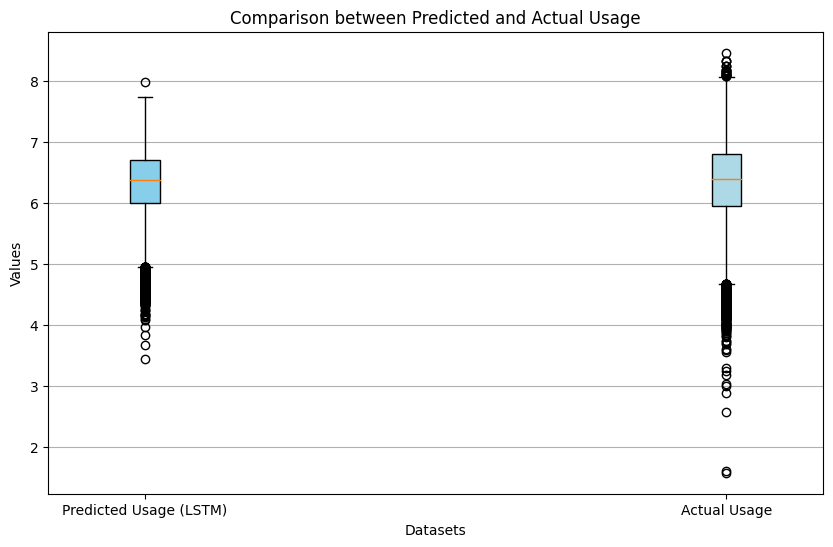

In [102]:
plt.figure(figsize=(10, 6))

plt.boxplot(test_predictions, positions=[1], labels=['Predicted Usage (LSTM)'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.boxplot(new_y_test, positions=[4], labels=['Actual Usage'], patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.xlabel('Datasets')
plt.ylabel('Values')
plt.title('Comparison between Predicted and Actual Usage')
plt.grid(axis='y')

plt.show()

The model seems to have had a smoother time predicting negative outliers rather than postiive ones.

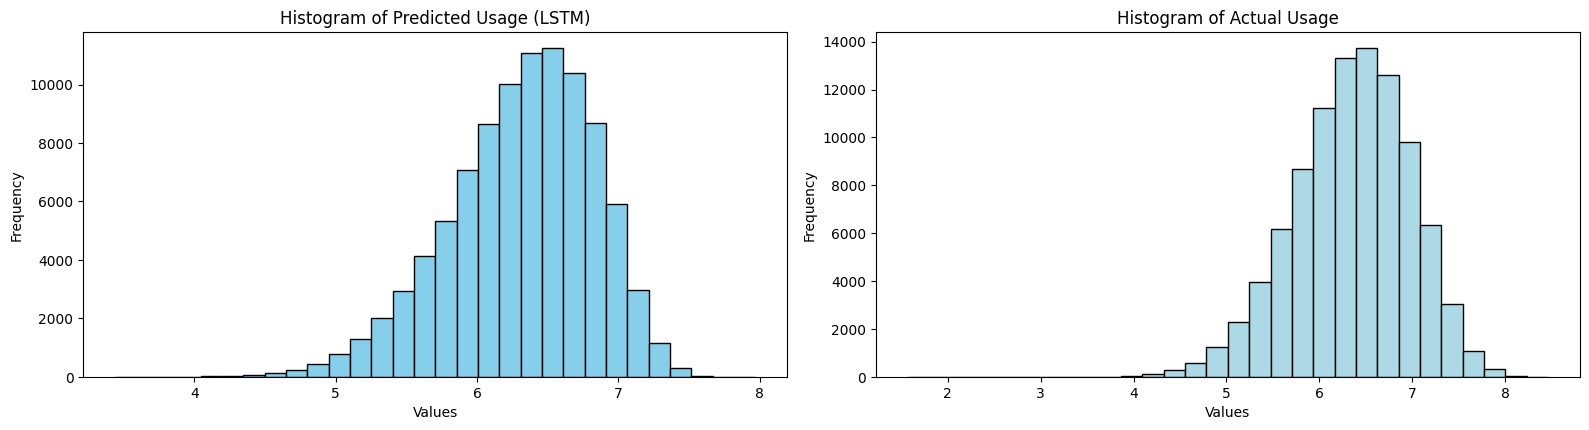

In [103]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.hist(test_predictions, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Usage (LSTM)')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(new_y_test, bins=30, color='lightblue', edgecolor='black')
plt.title('Histogram of Actual Usage')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

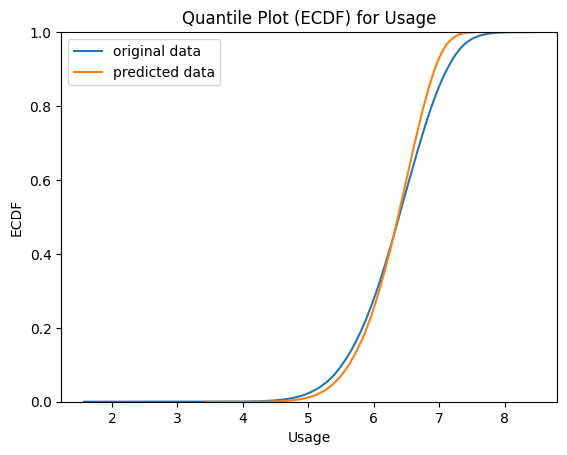

In [104]:
sns.ecdfplot(new_y_test, label='original data')
sns.ecdfplot(test_predictions, label='predicted data')

plt.title('Quantile Plot (ECDF) for Usage')
plt.xlabel('Usage')
plt.ylabel('ECDF')
plt.legend()

As seen on the histograms, boxplots and now the Quantile Plot, the distribution of the test values and predicte values are extremely similar.

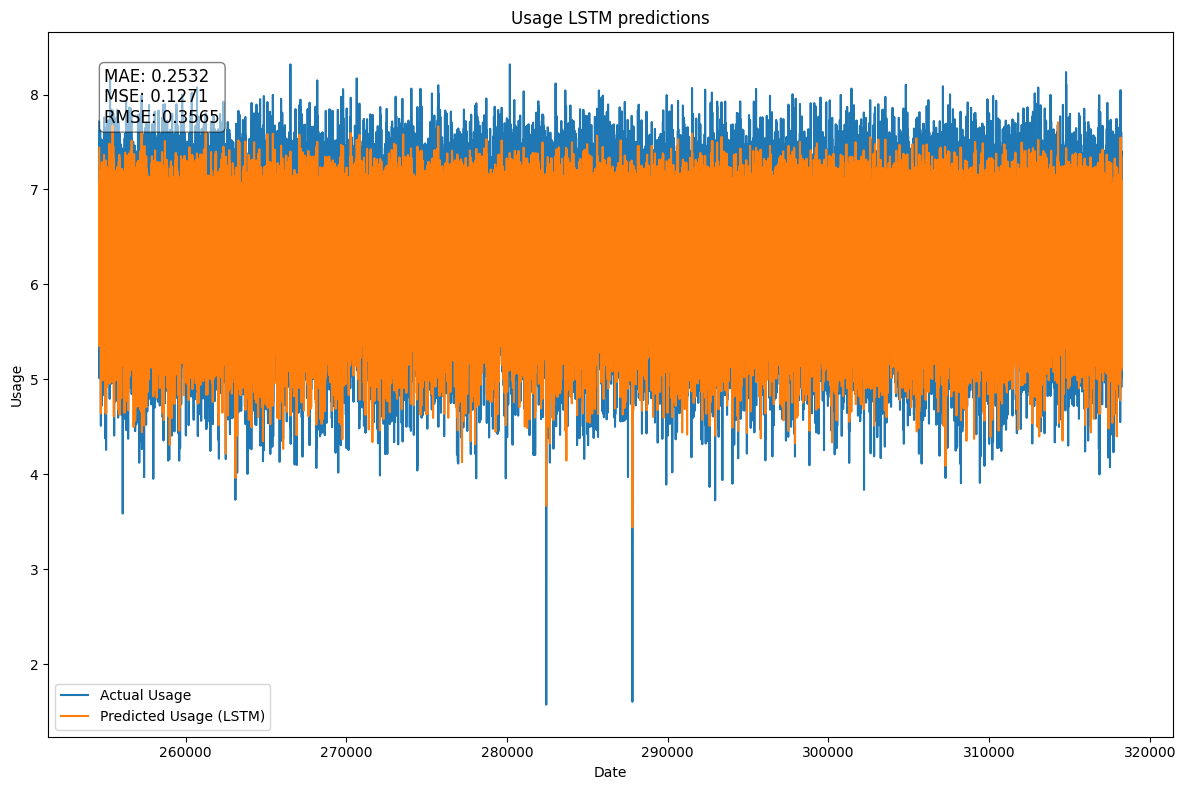

In [105]:
split_index = int(len(df) * 0.80)
df_train = df[:split_index]
df_test = df[split_index:]
min_length = min(len(df.index[split_index+1:]), len(new_y_test), len(test_predictions))

mse_lstm = mean_squared_error(new_y_test, test_predictions)
mae_lstm = mean_absolute_error(new_y_test, test_predictions)
rmse_lstm = np.sqrt(mse_lstm)

index_series = df.index[split_index+1:][:min_length]

new_y_test_series = new_y_test[:min_length]
test_predictions_series = test_predictions[:min_length]

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.set_title('Usage LSTM predictions')
ax1.plot(index_series, new_y_test_series, label='Actual Usage')
ax1.plot(index_series, test_predictions_series, label='Predicted Usage (LSTM)')

ax1.set_xlabel('Date')
ax1.set_ylabel('Usage')
ax1.legend()


textstr = f'MAE: {mae_lstm:.4f}\nMSE: {mse_lstm:.4f}\nRMSE: {rmse_lstm:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.5)


ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()


As it can be seen the model performed very well on the testing data, however due to the nature of the training dataset it's very likely that the model is overfit, but due to the state of the original timeseries hardly anything can be done about it.

# Using the selected models fore forecasting

In [106]:
testing_model = ts[['usage']].loc[ts['hh_id'] == 4].copy()
print(type(testing_model))
print(testing_model.head(50))

<class 'pandas.core.frame.DataFrame'>
       usage
15  5.894181
16  5.868767
17  6.061255
18  6.506459
19  6.364962
20  5.915738
21  6.073204
22  6.380123
23  6.336545
24  6.282438
25  6.071946
26  6.411048
27  6.666830
28  6.706251
29  6.627247


In [107]:
lookback = 14
shifted_df = prepare_dataframe_for_lstm(testing_model, lookback)


print("Processed DataFrame shape:", shifted_df.shape)
shifted_df_as_np = shifted_df.to_numpy()
print("Data before scaling:")
print(shifted_df_as_np)


shifted_df_as_np = scaler.transform(shifted_df_as_np)
shifted_df_as_np = shifted_df_as_np[:, :-1]
print("Data after scaling:")
print(shifted_df_as_np)
print(shifted_df_as_np)
print("Shape of shifted_df_as_np:", shifted_df_as_np.shape)
X = np.flip(shifted_df_as_np, axis=1).copy()
print("Shape of X:", X.shape)


X_test = X.reshape((1, lookback, 1))
print("Shape of X_test:", X_test.shape)
X_test = torch.tensor(X_test).float()
print(X_test.shape)


with torch.no_grad():
    model.eval()
    predictions_tensor = model(X_test)
    predictions = predictions_tensor.detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = predictions
dummies = scaler.inverse_transform(dummies)

new_y_test = (dummies[:, 0]).copy()

print(predictions)
print(new_y_test)

Processed DataFrame shape: (1, 15)
Data before scaling:
[[6.6272473 6.7062507 6.6668296 6.4110479 6.0719461 6.2824383 6.3365455
  6.3801227 6.0732036 5.9157381 6.3649616 6.5064588 6.061255  5.8687673
  5.8941808]]
Data after scaling:
[[0.57724238 0.59549209 0.58638585 0.52730053 0.44896834 0.49759184
  0.51009055 0.52015684 0.44925883 0.41288445 0.51665464 0.54934035
  0.44649871 0.40203424]]
[[0.57724238 0.59549209 0.58638585 0.52730053 0.44896834 0.49759184
  0.51009055 0.52015684 0.44925883 0.41288445 0.51665464 0.54934035
  0.44649871 0.40203424]]
Shape of shifted_df_as_np: (1, 14)
Shape of X: (1, 14)
Shape of X_test: (1, 14, 1)
torch.Size([1, 14, 1])
[0.55668753]
[6.53826491]


In [108]:
import torch
import numpy as np
import pandas as pd

def iterative_prediction(dataframe, model, scaler, n_steps, n_predictions):
    dataframe = dataframe.copy()
    final_predictions = []

    start_index = 0

    for iteration in range(n_predictions):
        if iteration > 0:
            dataframe_to_prepare = dataframe.iloc[start_index:]
        else:
            dataframe_to_prepare = dataframe
        shifted_df = prepare_dataframe_for_lstm(dataframe_to_prepare, n_steps)

        shifted_df_as_np = shifted_df.to_numpy()
        shifted_df_as_np = scaler.transform(shifted_df_as_np)
        shifted_df_as_np = shifted_df_as_np[:, :-1]

        X = np.flip(shifted_df_as_np, axis=1).copy()
        X_test = X.reshape((1, n_steps, 1))
        X_test = torch.tensor(X_test).float()

        with torch.no_grad():
            model.eval()
            predictions_tensor = model(X_test)
            predictions = predictions_tensor.detach().cpu().numpy().flatten()[0]


        dummies = np.zeros((X_test.shape[0], n_steps + 1))
        dummies[:, 0] = predictions
        dummies = scaler.inverse_transform(dummies)
        new_y_test = (dummies[:, 0]).copy()
        new_row = pd.DataFrame(data={'usage': [new_y_test]})
        dataframe = pd.concat([dataframe, new_row], ignore_index=True)

        final_predictions.append(new_y_test)

        start_index += 1

    return dataframe, final_predictions

lookback = 14
n_predictions = 5

ts_aggregated_sum = ts.groupby(['hsize', 'date'])['usage'].mean().reset_index()

results_dict = {}

for hh in ts_aggregated_sum['hsize'].unique():

    hh_data = ts_aggregated_sum[ts_aggregated_sum['hsize'] == hh].copy()

    hh_data = hh_data[['usage']].copy()

    print(f"Making predictions for household size {hh}")
    updated_dataframe, predicted_values = iterative_prediction(hh_data, model, scaler, lookback, n_predictions)

    results_dict[hh] = {
        'updated_dataframe': updated_dataframe,
        'predicted_values': predicted_values
    }

    print(f"Updated DataFrame shape for hsize {hh}: {updated_dataframe.shape}")
    print(f"Predicted values for hsize {hh}: {predicted_values}")

print("\n--- Final Predictions and DataFrames for All Household Sizes ---\n")
for hh, result in results_dict.items():
    print(f"Household Size {hh}:")
    print("Updated DataFrame:")
    print(result['updated_dataframe'].tail())
    print("Predicted values:")
    print(result['predicted_values'])
    print("\n")


Making predictions for household size 1
Updated DataFrame shape for hsize 1: (20, 1)
Predicted values for hsize 1: [array([6.19961982]), array([6.21473147]), array([6.23158172]), array([6.24137047]), array([6.24781631])]
Making predictions for household size 2
Updated DataFrame shape for hsize 2: (20, 1)
Predicted values for hsize 2: [array([6.33835679]), array([6.3396761]), array([6.34560253]), array([6.34687126]), array([6.34550061])]
Making predictions for household size 3
Updated DataFrame shape for hsize 3: (20, 1)
Predicted values for hsize 3: [array([6.44357079]), array([6.42954584]), array([6.42590529]), array([6.42047118]), array([6.41318055])]
Making predictions for household size 4
Updated DataFrame shape for hsize 4: (20, 1)
Predicted values for hsize 4: [array([6.52837617]), array([6.50085058]), array([6.48915099]), array([6.47796798]), array([6.46569762])]
Making predictions for household size 5
Updated DataFrame shape for hsize 5: (20, 1)
Predicted values for hsize 5: [a

I specifically picked ZIP for this since it's mean aggregation presented the most diversity

Making predictions for income level 1
Updated DataFrame shape for income 1: (20, 1)
Predicted values for income 1: [array([6.25589265]), array([6.26283675]), array([6.27421186]), array([6.28076905]), array([6.28454144])]
Making predictions for income level 2
Updated DataFrame shape for income 2: (20, 1)
Predicted values for income 2: [array([6.2166187]), array([6.23065204]), array([6.24611589]), array([6.25476338]), array([6.2602309])]
Making predictions for income level 3
Updated DataFrame shape for income 3: (20, 1)
Predicted values for income 3: [array([6.27062667]), array([6.28102669]), array([6.29277814]), array([6.29806001]), array([6.30031932])]
Making predictions for income level 4
Updated DataFrame shape for income 4: (20, 1)
Predicted values for income 4: [array([6.2934516]), array([6.30115482]), array([6.31127656]), array([6.31529847]), array([6.31630479])]
Making predictions for income level 5
Updated DataFrame shape for income 5: (20, 1)
Predicted values for income 5: [arr

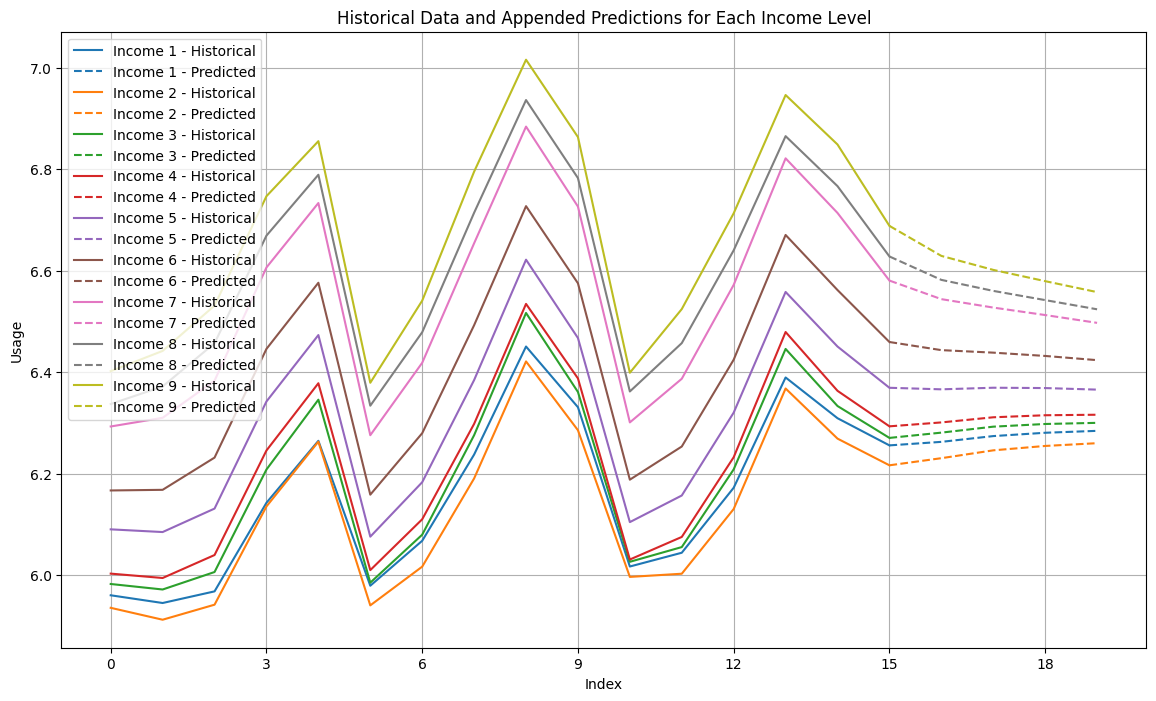

In [109]:
ts_aggregated_sum = ts.groupby(['income', 'date'])['usage'].mean().reset_index()

results_dict = {}

for income in ts_aggregated_sum['income'].unique():

    income_data = ts_aggregated_sum[ts_aggregated_sum['income'] == income].copy()

    income_data = income_data[['usage']].copy()

    print(f"Making predictions for income level {income}")
    updated_dataframe, predicted_values = iterative_prediction(income_data, model, scaler, lookback, n_predictions)

    results_dict[income] = {
        'updated_dataframe': updated_dataframe,
        'predicted_values': predicted_values
    }

    print(f"Updated DataFrame shape for income {income}: {updated_dataframe.shape}")
    print(f"Predicted values for income {income}: {predicted_values}")

print("\n--- Final Predictions and DataFrames for All Income Levels ---\n")
for income, result in results_dict.items():
    print(f"Income Level {income}:")
    print("Updated DataFrame:")
    print(result['updated_dataframe'].tail())
    print("Predicted values:")
    print(result['predicted_values'])
    print("\n")

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(14, 8))
for i, (income, result) in enumerate(results_dict.items()):
    color = default_colors[i % len(default_colors)]  #

    historical_data = result['updated_dataframe']['usage'].iloc[:len(result['updated_dataframe']) - n_predictions+1]
    predicted_data = result['updated_dataframe']['usage'].iloc[len(result['updated_dataframe']) - n_predictions:]

    plt.plot(historical_data.index, historical_data, linestyle='-', color=color, label=f'Income {income} - Historical')

    plt.plot(predicted_data.index, predicted_data, linestyle='--', color=color, label=f'Income {income} - Predicted')

plt.title("Historical Data and Appended Predictions for Each Income Level")
plt.xlabel("Index")
plt.ylabel("Usage")
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

In [110]:
import pandas as pd

ts_aggregated_sum = ts.groupby(['hh_id', 'date'])['usage'].mean().reset_index()

all_data = []

for hh_id in ts_aggregated_sum['hh_id'].unique():
    hh_id_data = ts_aggregated_sum[ts_aggregated_sum['hh_id'] == hh_id].copy()

    hh_id_data = hh_id_data[['usage']].copy()

    print(f"Making predictions for household ID {hh_id}")
    updated_dataframe, predicted_values = iterative_prediction(hh_id_data, model, scaler, lookback, n_predictions)

    print(f"Updated DataFrame shape for hh_id {hh_id}: {updated_dataframe.shape}")
    print(f"Predicted values for hh_id {hh_id}: {predicted_values}")


    historical_data = updated_dataframe[['usage']].iloc[:len(updated_dataframe) - n_predictions+1].copy()
    historical_data['type'] = 'Historical'
    historical_data['hh_id'] = hh_id

    predicted_data = pd.DataFrame(predicted_values, columns=['usage'])
    predicted_data['type'] = 'Predicted'
    predicted_data['hh_id'] = hh_id

    all_data.append(historical_data)
    all_data.append(predicted_data)

combined_df = pd.concat(all_data, ignore_index=True)

combined_df.to_csv('LSTM_Predictions.csv', index=False)

print("All data has been saved to 'LSTM_Predictions.csv'.")


Streaming output truncated to the last 5000 lines.
Predicted values for hh_id 44866: [array([6.37895521]), array([6.35896822]), array([6.36494135]), array([6.36818221]), array([6.36662603])]
Making predictions for household ID 44867
Updated DataFrame shape for hh_id 44867: (20, 1)
Predicted values for hh_id 44867: [array([6.9894714]), array([6.84845498]), array([6.79385174]), array([6.75310211]), array([6.71577964])]
Making predictions for household ID 44868
Updated DataFrame shape for hh_id 44868: (20, 1)
Predicted values for hh_id 44868: [array([6.64460598]), array([6.62165964]), array([6.59697212]), array([6.57261204]), array([6.54984013])]
Making predictions for household ID 44873
Updated DataFrame shape for hh_id 44873: (20, 1)
Predicted values for hh_id 44873: [array([5.27764689]), array([5.37932536]), array([5.40479755]), array([5.43606226]), array([5.47832355])]
Making predictions for household ID 44874
Updated DataFrame shape for hh_id 44874: (20, 1)
Predicted values for hh_id

Since plotting all the possible household forecasts would be next to impossible I opted instead to compute them, insert them into a dataframe and then make them downloadable in CSV format.

In [123]:
combined_df.head(21)

usage        type  hh_id
0              6.505642  Historical      3
1              6.388161  Historical      3
2              6.207919  Historical      3
3              6.439571  Historical      3
4              6.651676  Historical      3
5              6.322805  Historical      3
6              6.510683  Historical      3
7              6.696693  Historical      3
8              6.967286  Historical      3
9              6.966908  Historical      3
10             6.456377  Historical      3
11             6.486542  Historical      3
12             6.625392  Historical      3
13             6.730977  Historical      3
14             6.699666  Historical      3
15  [6.612521256335549]  Historical      3
16             6.612521   Predicted      3
17             6.565338   Predicted      3
18             6.542388   Predicted      3
19             6.524652   Predicted      3
20             6.507832   Predicted      3

Making predictions for zip code 1.0
Updated DataFrame shape for zip code 1.0: (20, 1)
Predicted values for zip code 1.0: [array([6.45358751]), array([6.44331405]), array([6.44045663]), array([6.43421102]), array([6.42567255])]
Making predictions for zip code 2.0
Updated DataFrame shape for zip code 2.0: (20, 1)
Predicted values for zip code 2.0: [array([6.32920319]), array([6.33236328]), array([6.33593544]), array([6.33639757]), array([6.33554091])]
Making predictions for zip code 3.0
Updated DataFrame shape for zip code 3.0: (20, 1)
Predicted values for zip code 3.0: [array([5.73274292]), array([5.75368269]), array([5.7556103]), array([5.78189799]), array([5.81578789])]
Making predictions for zip code 4.0
Updated DataFrame shape for zip code 4.0: (20, 1)
Predicted values for zip code 4.0: [array([5.85848526]), array([5.9275334]), array([5.97009504]), array([5.99127606]), array([6.01004051])]
Making predictions for zip code 5.0
Updated DataFrame shape for zip code 5.0: (20, 1)
Predicte

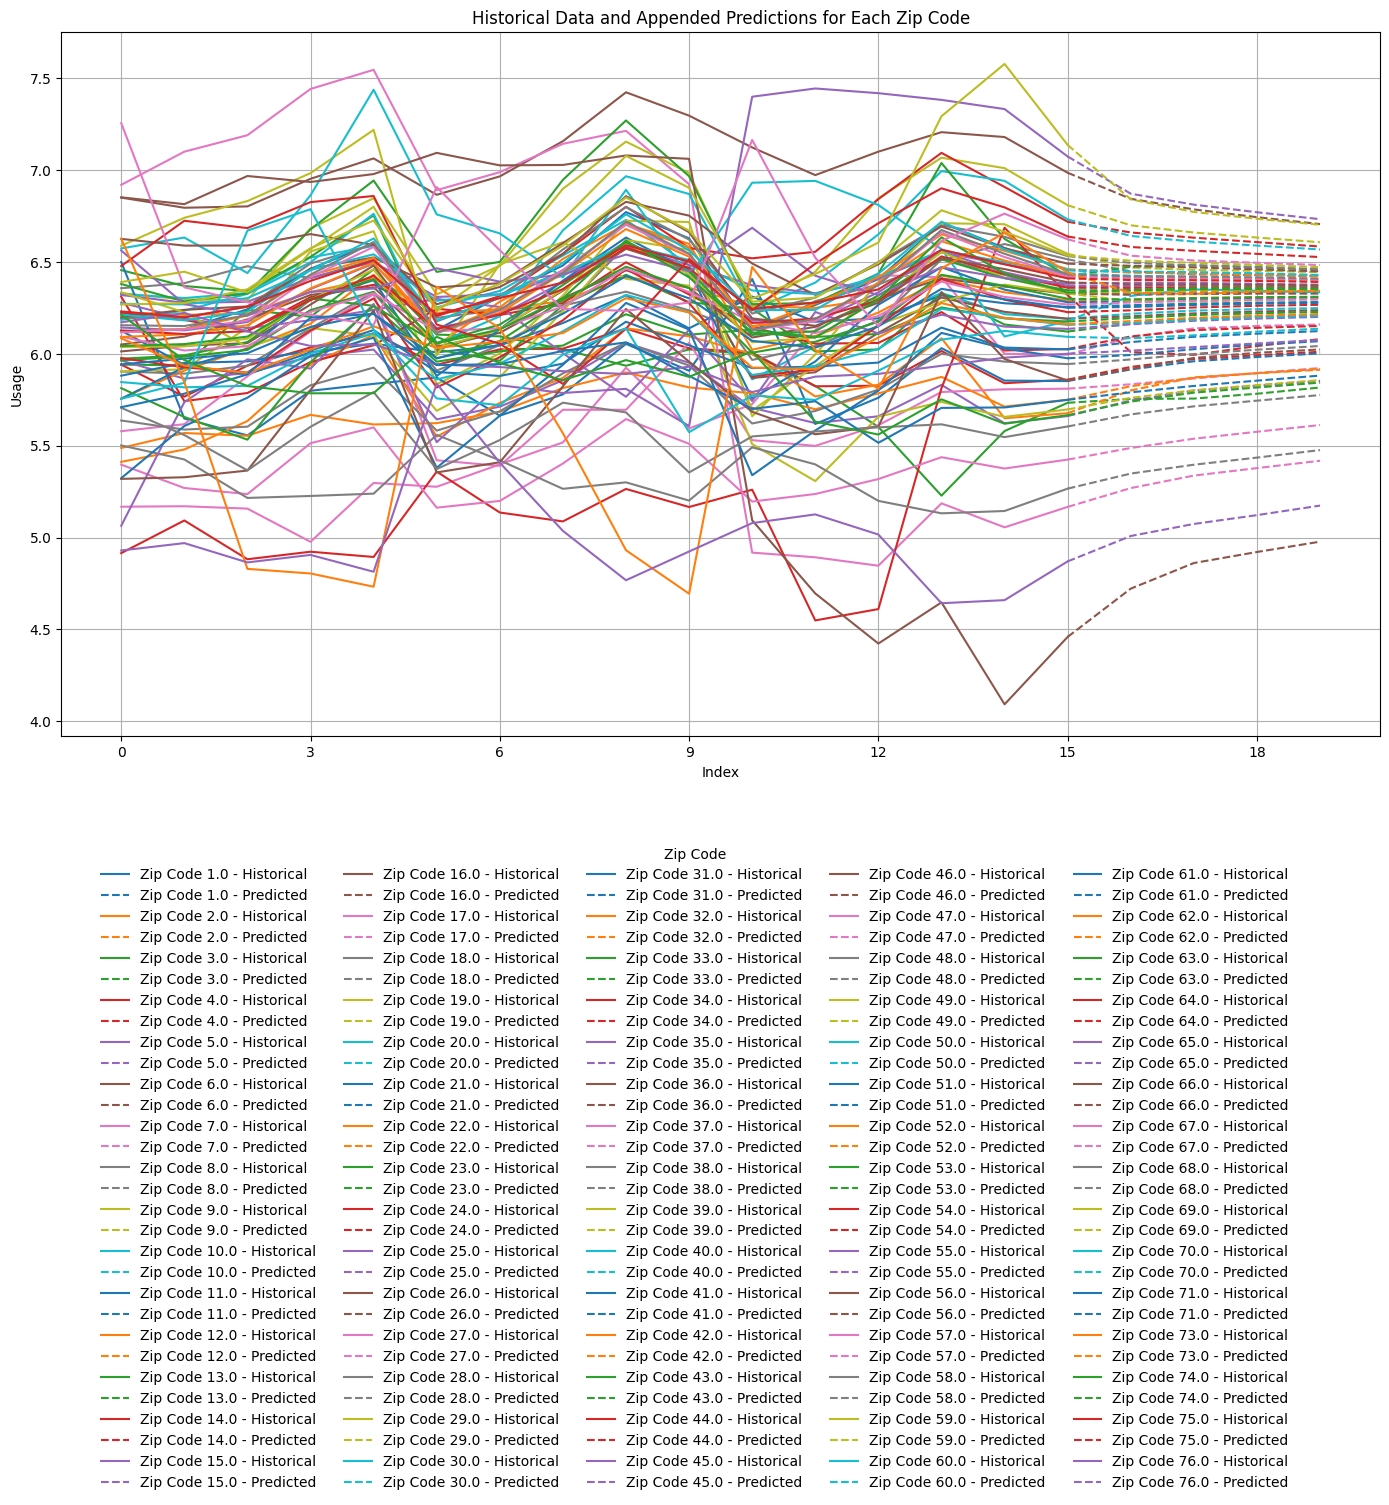

In [111]:
ts_aggregated_sum = ts.groupby(['zipcode', 'date'])['usage'].mean().reset_index()

results_dict = {}

for zipcode in ts_aggregated_sum['zipcode'].unique():

    zipcode_data = ts_aggregated_sum[ts_aggregated_sum['zipcode'] == zipcode].copy()

    zipcode_data = zipcode_data[['usage']].copy()

    print(f"Making predictions for zip code {zipcode}")
    updated_dataframe, predicted_values = iterative_prediction(zipcode_data, model, scaler, lookback, n_predictions)


    results_dict[zipcode] = {
        'updated_dataframe': updated_dataframe,
        'predicted_values': predicted_values
    }


    print(f"Updated DataFrame shape for zip code {zipcode}: {updated_dataframe.shape}")
    print(f"Predicted values for zip code {zipcode}: {predicted_values}")

print("\n--- Final Predictions and DataFrames for All Zip Codes ---\n")
for zipcode, result in results_dict.items():
    print(f"Zip Code {zipcode}:")
    print("Updated DataFrame:")
    print(result['updated_dataframe'].tail())
    print("Predicted values:")
    print(result['predicted_values'])
    print("\n")

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax = plt.subplots(figsize=(14, 8))
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
handles = []

for i, (zipcode, result) in enumerate(results_dict.items()):
    color = default_colors[i % len(default_colors)]
    historical_data = result['updated_dataframe']['usage'].iloc[:len(result['updated_dataframe']) - n_predictions+1]
    predicted_data = result['updated_dataframe']['usage'].iloc[len(result['updated_dataframe']) - n_predictions:]

    line, = ax.plot(historical_data.index, historical_data, linestyle='-', color=color, label=f'Zip Code {zipcode} - Historical')
    handles.append(line)

    line, = ax.plot(predicted_data.index, predicted_data, linestyle='--', color=color, label=f'Zip Code {zipcode} - Predicted')
    handles.append(line)

ax.set_title("Historical Data and Appended Predictions for Each Zip Code")
ax.set_xlabel("Index")
ax.set_ylabel("Usage")
ax.grid(True)


ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))


fig.legend(handles, [h.get_label() for h in handles], title='Zip Code', loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5, frameon=False)


plt.tight_layout()
plt.show()

please scroll down to see the plot

# Note on the forecast with Holt-Winters

I used the train and test split from earlier to check how well it would hypothetically perform and since it did so decently, when it comes to the actual forecast, the entire set of observations will be the "training values" and it will aim to predict the next 5 future values

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


ts['date'] = pd.to_datetime(ts['date'])


ts_aggregated_mean = ts.groupby(['hsize', 'date'])['usage'].mean().reset_index()


ts_aggregated_mean_pivot = ts_aggregated_mean.pivot(index='date', columns='hsize', values='usage')


ts_aggregated_mean_pivot.index = pd.DatetimeIndex(ts_aggregated_mean_pivot.index).to_period('D').to_timestamp()

forecasts_hw = {}
complete_series = {}

train_size = 10
test_size = 5


for hsize in ts_aggregated_mean_pivot.columns:
    usage_series = ts_aggregated_mean_pivot[hsize].dropna()

    if len(usage_series) < train_size + test_size:
        continue


    holt_add = ExponentialSmoothing(endog=usage_series,
                                    trend='add',
                                    seasonal='add',
                                    seasonal_periods=5).fit()

    forecast_hw = holt_add.predict(start=len(usage_series), end=len(usage_series) + 4)

    forecasts_hw[hsize] = forecast_hw
    actuals[hsize] = test
    new_series = pd.concat([usage_series, forecasts_hw[hsize]])
    new_dates = pd.date_range(start='2012-03-01', end='2012-08-01', freq='MS')
    new_series.iloc[14:21] = new_series.iloc[14:21].values
    new_series.index.values[14:21] = new_dates
    complete_series[hsize] = new_series
    print(new_series)
    print(new_series.iloc[14:21])

forecast_hw_df = pd.DataFrame(forecasts_hw)


print(forecast_hw_df)
print(complete_series)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

2009-04-01 00:00:00    5.891088
2009-05-01 00:00:00    5.869988
2009-06-01 00:00:00    5.906734
2009-07-01 00:00:00    6.108854
2009-08-01 00:00:00    6.235002
2010-04-01 00:00:00    5.906127
2010-05-01 00:00:00    5.997851
2010-06-01 00:00:00    6.174290
2010-07-01 00:00:00    6.399847
2010-08-01 00:00:00    6.256605
2011-04-01 00:00:00    5.950779
2011-05-01 00:00:00    5.973907
2011-06-01 00:00:00    6.114661
2011-07-01 00:00:00    6.351501
2012-03-01 00:00:00    6.251285
2012-04-01 00:00:00    5.933985
2012-05-01 00:00:00    5.965259
2012-06-01 00:00:00    6.083204
2012-07-01 00:00:00    6.304730
2012-08-01 00:00:00    6.265634
dtype: float64
2012-03-01 00:00:00    6.251285
2012-04-01 00:00:00    5.933985
2012-05-01 00:00:00    5.965259
2012-06-01 00:00:00    6.083204
2012-07-01 00:00:00    6.304730
2012-08-01 00:00:00    6.265634
dtype: float64
2009-04-01 00:00:00    6.052595
2009-05-01 00:00:00    6.048004
2009-06-01 00:00:00    6.095142
2009-07-01 00:00:00    6.302210
2009-08-01

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/py

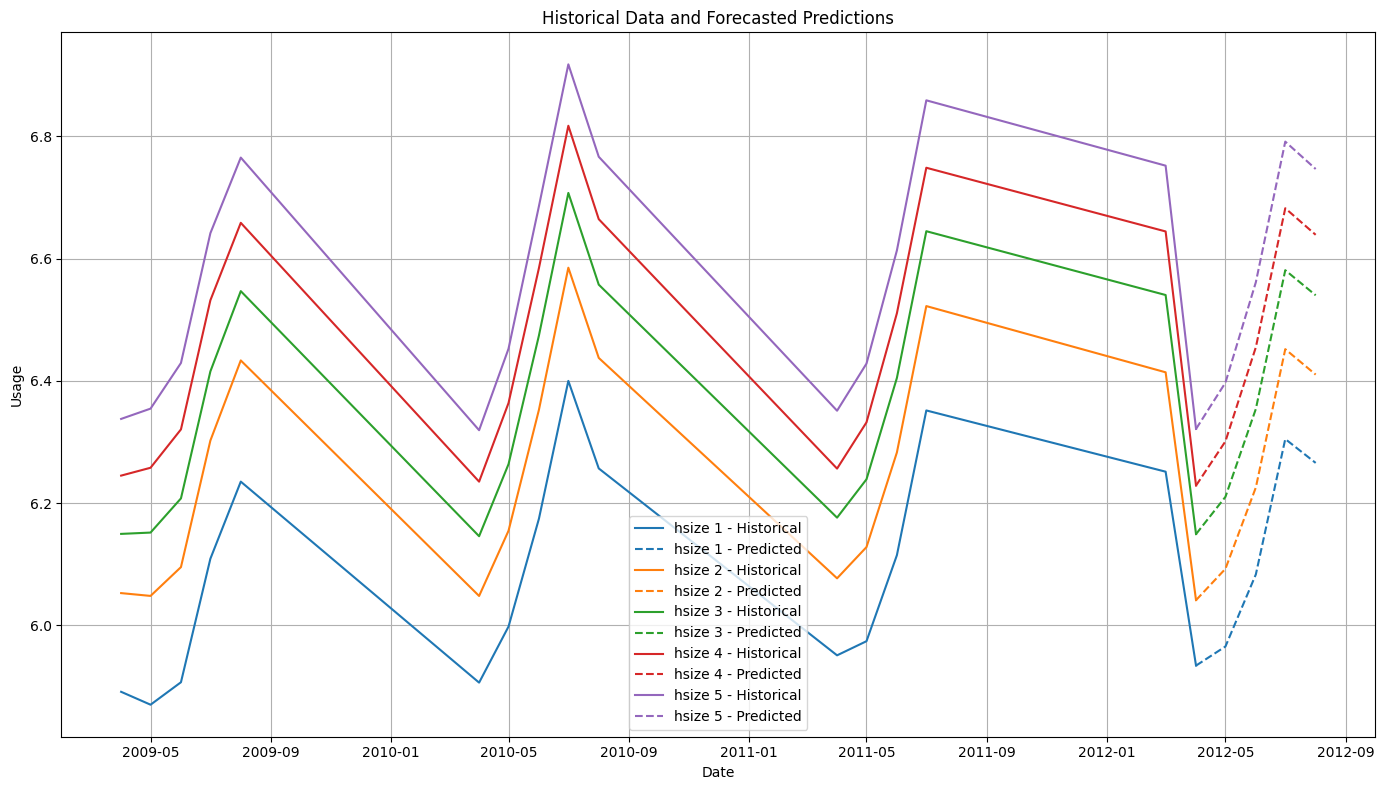

In [113]:
fig, ax = plt.subplots(figsize=(14, 8))
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
handles = []

for i, (hsize, series) in enumerate(complete_series.items()):
    color = default_colors[i % len(default_colors)]


    historical_data = series.iloc[:-n_predictions+1]
    predicted_data = series.iloc[-n_predictions:]

    line, = ax.plot(historical_data.index, historical_data, linestyle='-', color=color, label=f'hsize {hsize} - Historical')
    handles.append(line)

    line, = ax.plot(predicted_data.index, predicted_data, linestyle='--', color=color, label=f'hsize {hsize} - Predicted')
    handles.append(line)

ax.set_title("Historical Data and Forecasted Predictions")
ax.set_xlabel("Date")
ax.set_ylabel("Usage")
ax.grid(True)
ax.legend(handles=handles, loc='best')

plt.tight_layout()
plt.show()